<a href="https://colab.research.google.com/github/tifaniann/Python/blob/main/PREDICTION_RAINFALL_2010_2023_FAKFAK_WEST_PAPUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLEANING DATA 2010-2014**

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('BMKG_Fakfak_2010-2014.csv')

# Ganti nilai 8888 dan 9999 dengan NaN
data.replace({8888: np.nan, 9999: np.nan}, inplace=True)

In [ ]:
import pandas as pd

# Tampilkan presentase missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Presentase Missing Values:\n", missing_percentage)

# Hapus kolom dengan presentase missing values lebih dari 30%
# columns_to_drop = missing_percentage[missing_percentage > 30].index
# data.drop(columns=columns_to_drop, inplace=True)

# Ganti nilai missing values dengan interpolasi untuk semua kolom
columns_to_fillna = missing_percentage.index
data.fillna(data.median(), inplace=True)

# Bulatkan nilai setelah interpolasi
data = data.round(2)

# Ganti nilai missing values dengan mode untuk kolom 'ddd_car'
mode_value = data['ddd_car'].mode().iloc[0]
data['ddd_car'].fillna(mode_value, inplace=True)

# Eksport dataset yang sudah dibersihkan
data.to_csv('fakfak_2010-2014-clean_12.csv', index=False)

print("Dataset yang sudah dibersihkan telah diekspor ke 'fakfak_2010-2014-clean_12.csv'")


Presentase Missing Values:
 Tanggal     0.000000
Tn          5.093100
Tx          4.983571
Tavg        5.093100
RH_avg     45.345016
RR          6.352683
ss          5.038335
ff_x        8.378970
ddd_x       8.378970
ff_avg      8.378970
ddd_car    11.774370
dtype: float64
Dataset yang sudah dibersihkan telah diekspor ke 'fakfak_2010-2014-clean_12.csv'


<ipython-input-2-3df397e7e661>:13: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [ ]:
# Tampilkan presentase missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Presentase Missing Values:\n", missing_percentage)

Presentase Missing Values:
 Tanggal    0.0
Tn         0.0
Tx         0.0
Tavg       0.0
RH_avg     0.0
RR         0.0
ss         0.0
ff_x       0.0
ddd_x      0.0
ff_avg     0.0
ddd_car    0.0
dtype: float64


In [ ]:
df = data

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1826 non-null   datetime64[ns]
 1   Tn       1826 non-null   float64       
 2   Tx       1826 non-null   float64       
 3   Tavg     1826 non-null   float64       
 4   RH_avg   1826 non-null   float64       
 5   RR       1826 non-null   float64       
 6   ss       1826 non-null   float64       
 7   ff_x     1826 non-null   float64       
 8   ddd_x    1826 non-null   float64       
 9   ff_avg   1826 non-null   float64       
 10  ddd_car  1826 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 157.0+ KB


<ipython-input-5-3338a57b38b5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])


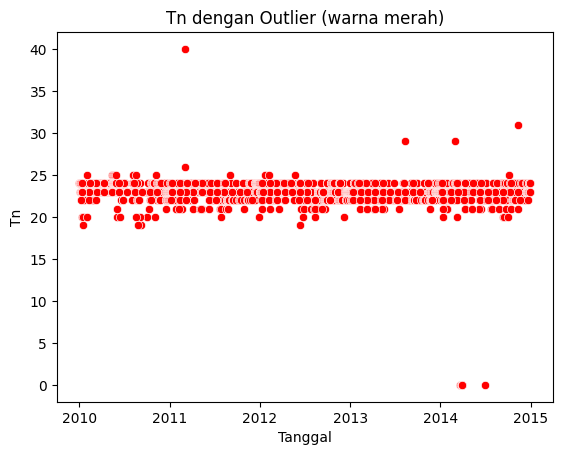

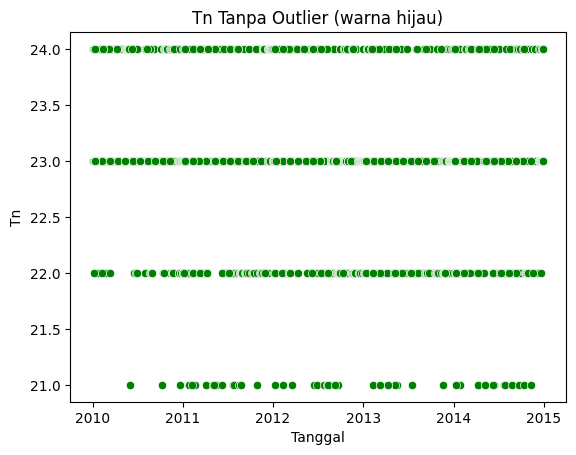

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='Tn', color='red')
plt.title('Tn dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['Tn'].quantile(0.25)
Q3 = df['Tn'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['Tn'] >= batas_bawah) & (df['Tn'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='Tn', color='green')
plt.title('Tn Tanpa Outlier (warna hijau)')
plt.show()

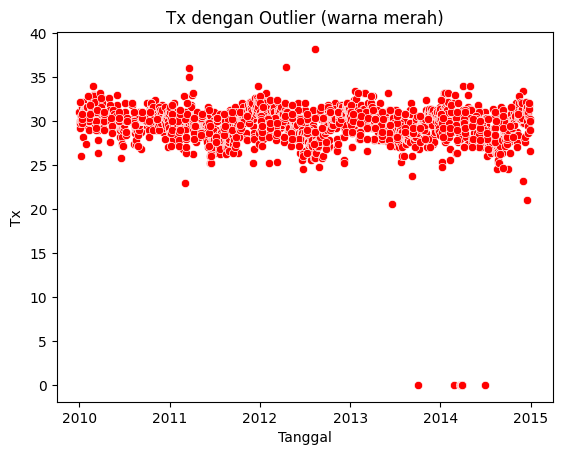

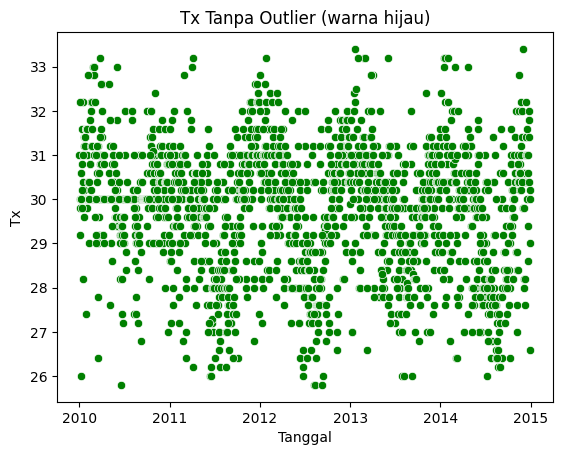

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='Tx', color='red')
plt.title('Tx dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['Tx'].quantile(0.25)
Q3 = df['Tx'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['Tx'] >= batas_bawah) & (df['Tx'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='Tx', color='green')
plt.title('Tx Tanpa Outlier (warna hijau)')
plt.show()

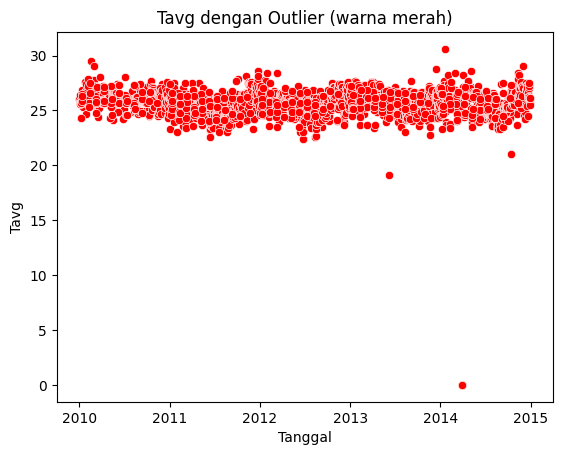

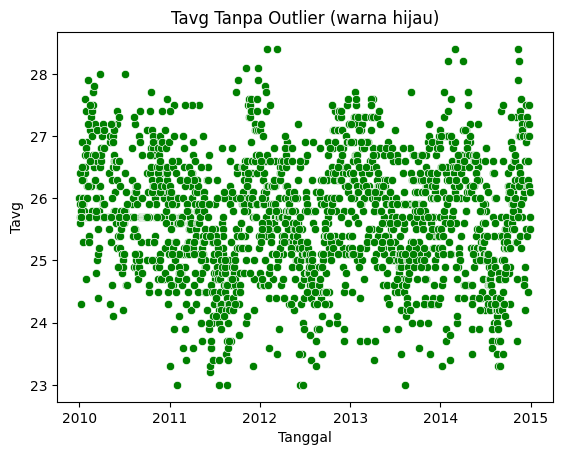

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='Tavg', color='red')
plt.title('Tavg dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['Tavg'].quantile(0.25)
Q3 = df['Tavg'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['Tavg'] >= batas_bawah) & (df['Tavg'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='Tavg', color='green')
plt.title('Tavg Tanpa Outlier (warna hijau)')
plt.show()

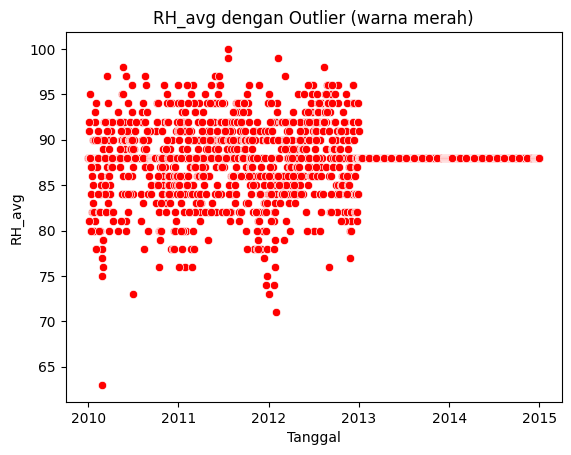

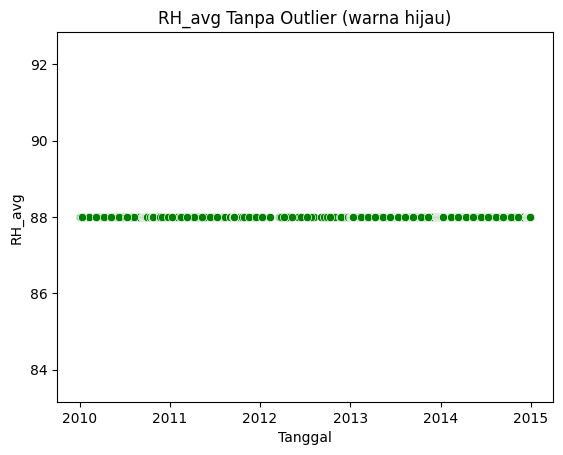

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='RH_avg', color='red')
plt.title('RH_avg dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['RH_avg'].quantile(0.25)
Q3 = df['RH_avg'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['RH_avg'] >= batas_bawah) & (df['RH_avg'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='RH_avg', color='green')
plt.title('RH_avg Tanpa Outlier (warna hijau)')
plt.show()

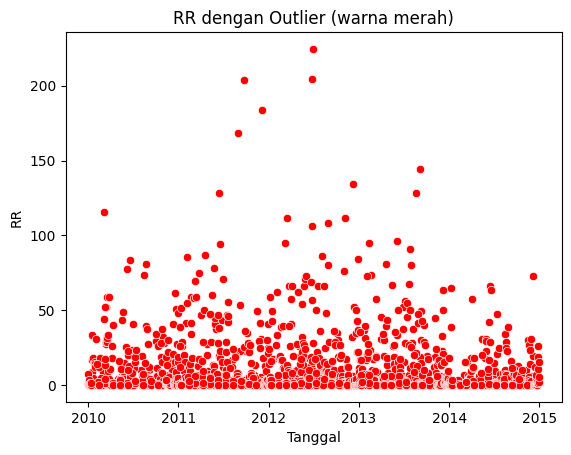

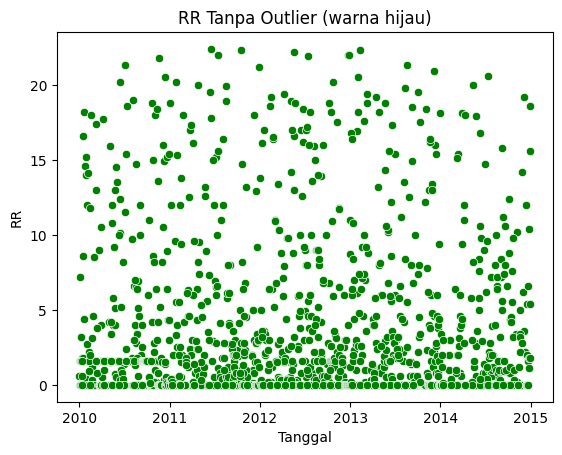

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='RR', color='red')
plt.title('RR dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['RR'].quantile(0.25)
Q3 = df['RR'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['RR'] >= batas_bawah) & (df['RR'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='RR', color='green')
plt.title('RR Tanpa Outlier (warna hijau)')
plt.show()

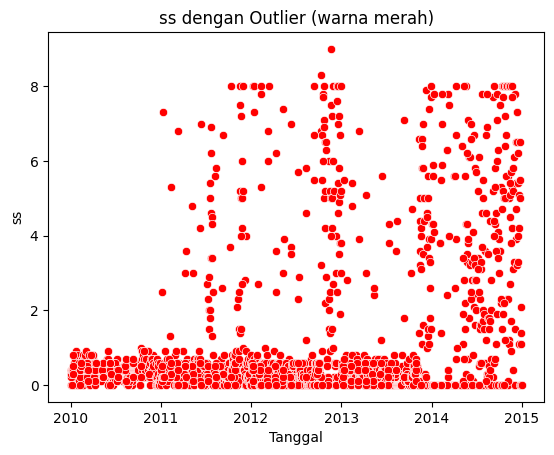

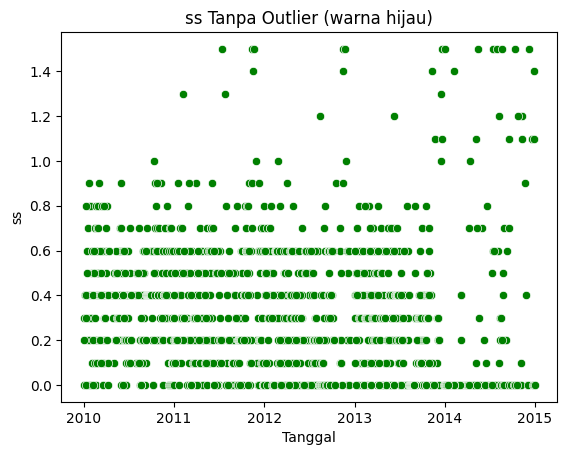

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ss', color='red')
plt.title('ss dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ss'].quantile(0.25)
Q3 = df['ss'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ss'] >= batas_bawah) & (df['ss'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ss', color='green')
plt.title('ss Tanpa Outlier (warna hijau)')
plt.show()

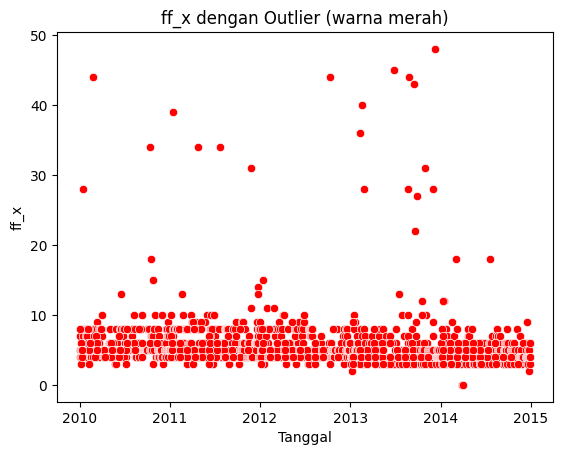

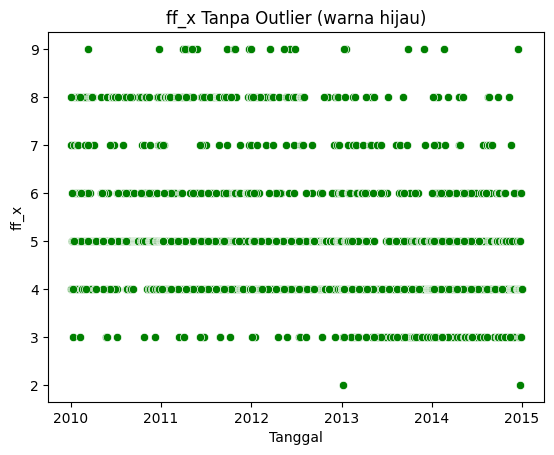

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ff_x', color='red')
plt.title('ff_x dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ff_x'].quantile(0.25)
Q3 = df['ff_x'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ff_x'] >= batas_bawah) & (df['ff_x'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ff_x', color='green')
plt.title('ff_x Tanpa Outlier (warna hijau)')
plt.show()

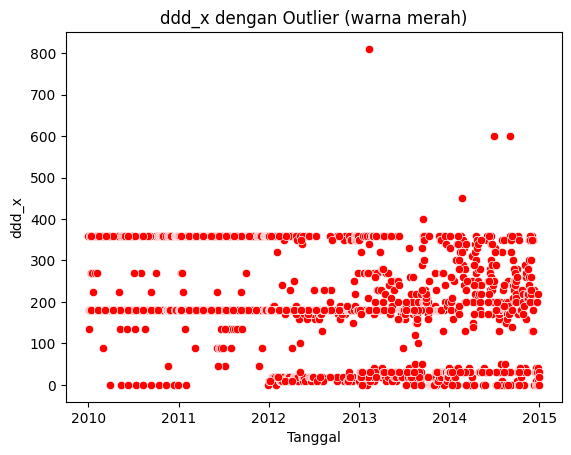

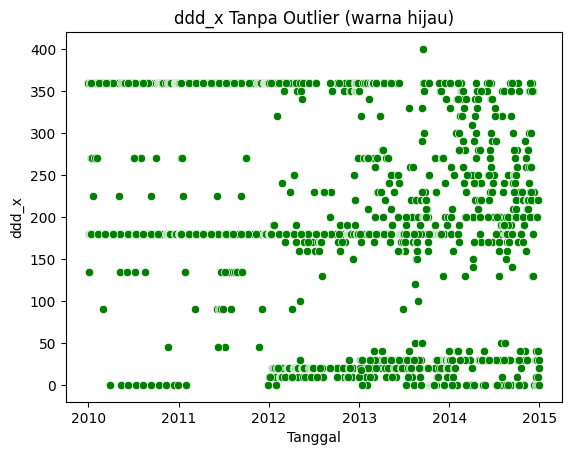

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ddd_x', color='red')
plt.title('ddd_x dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ddd_x'].quantile(0.25)
Q3 = df['ddd_x'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ddd_x'] >= batas_bawah) & (df['ddd_x'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ddd_x', color='green')
plt.title('ddd_x Tanpa Outlier (warna hijau)')
plt.show()

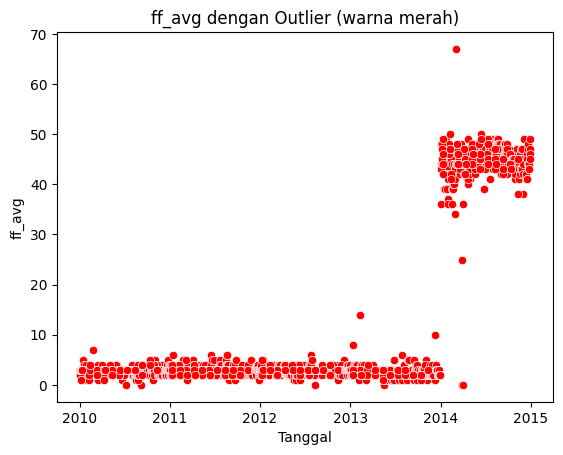

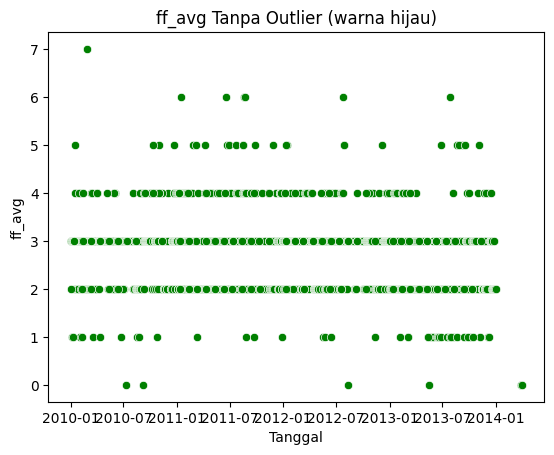

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ff_avg', color='red')
plt.title('ff_avg dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ff_avg'].quantile(0.25)
Q3 = df['ff_avg'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ff_avg'] >= batas_bawah) & (df['ff_avg'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ff_avg', color='green')
plt.title('ff_avg Tanpa Outlier (warna hijau)')
plt.show()

In [ ]:
#memeriksa presentase missing values pada setiap variable
#menghitung jumlah sampel
n = len(df)
n
missing = df.isna().sum()/n*100
missing

Tanggal    0.0
Tn         0.0
Tx         0.0
Tavg       0.0
RH_avg     0.0
RR         0.0
ss         0.0
ff_x       0.0
ddd_x      0.0
ff_avg     0.0
ddd_car    0.0
dtype: float64

In [ ]:
#menyimpan data setelah pra pemrosesan data
df.to_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv', index = False)

In [ ]:
import pandas as pd
df = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')
df.corr()

<ipython-input-2-cc3b3696c8cb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
Tn,1.000000,0.481838,0.593774,-0.063877,-0.034192,-0.009540,0.022590,0.062594,-0.051862
Tx,0.481838,1.000000,0.649905,-0.256316,-0.096504,0.117262,0.054061,0.122390,-0.113846
Tavg,0.593774,0.649905,1.000000,-0.338038,-0.146513,0.133712,0.053572,0.104355,0.000892
RH_avg,-0.063877,-0.256316,-0.338038,1.000000,0.253521,-0.111036,-0.052270,-0.070098,0.018371
RR,-0.034192,-0.096504,-0.146513,0.253521,1.000000,-0.100440,0.049078,-0.000336,-0.116076
ss,-0.009540,0.117262,0.133712,-0.111036,-0.100440,1.000000,-0.071844,-0.029605,0.305963
ff_x,0.022590,0.054061,0.053572,-0.052270,0.049078,-0.071844,1.000000,0.128917,-0.080018
ddd_x,0.062594,0.122390,0.104355,-0.070098,-0.000336,-0.029605,0.128917,1.000000,-0.105339
ff_avg,-0.051862,-0.113846,0.000892,0.018371,-0.116076,0.305963,-0.080018,-0.105339,1.000000


# **PREDIKSI TAHUN 2015 MENGGUNAKAN 2010-2014 dan menggunakan algoritma LSTM DAN LINEAR REGRESI**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import *

# Load your dataset
# Assuming 'your_data.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
target = 'RR'  # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform to get actual scale
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Make predictions on the test set
predictions = model.predict(X_test)

def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')


forecast_data_scaled = scaler_X.transform(data[features])
forecast_data_reshaped = forecast_data_scaled.reshape((forecast_data_scaled.shape[0], 1, forecast_data_scaled.shape[1]))

forecast_predictions_scaled = model.predict(forecast_data_reshaped)
forecast_predictions = scaler_y.inverse_transform(forecast_predictions_scaled)

# Combine actual RR values with forecasted values
forecast_result_df = pd.DataFrame({'Actual': data['RR'], 'Predicted': forecast_predictions.flatten()})
forecast_result_df.to_csv('forecast_actual_comparison_RR_LSTM.csv', index=False)

Epoch 1/50
46/46 [==============================] - 8s 27ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 2/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 3/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0085
Epoch 4/50
46/46 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 5/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 7/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 0.0078
Epoch 8/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 9/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0077
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0078
Epoch 11/50
46/46 

<ipython-input-1-47594908bc6f>:54: RuntimeWarning: divide by zero encountered in divide
  return (np.fabs(y_test - predictions)/y_test)[mask].mean()


58/58 [==============================] - 0s 3ms/step


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import *

# Load your dataset
# Assuming 'your_data.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
target = 'Tn'  # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform to get actual scale
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Make predictions on the test set
predictions = model.predict(X_test)

def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')


forecast_data_scaled = scaler_X.transform(data[features])
forecast_data_reshaped = forecast_data_scaled.reshape((forecast_data_scaled.shape[0], 1, forecast_data_scaled.shape[1]))

forecast_predictions_scaled = model.predict(forecast_data_reshaped)
forecast_predictions = scaler_y.inverse_transform(forecast_predictions_scaled)

# Combine actual RR values with forecasted values
forecast_result_df = pd.DataFrame({'Actual': data['Tn'], 'Predicted': forecast_predictions.flatten()})
forecast_result_df.to_csv('forecast_actual_comparison_Tn_LSTM.csv', index=False)

Epoch 1/50
46/46 [==============================] - 3s 14ms/step - loss: 0.1638 - val_loss: 0.0557
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.0080
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0054
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0034
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 11/50
46/46 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import *

# Load your dataset
# Assuming 'your_data.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
target = 'Tx'  # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform to get actual scale
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Make predictions on the test set
predictions = model.predict(X_test)

def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')


forecast_data_scaled = scaler_X.transform(data[features])
forecast_data_reshaped = forecast_data_scaled.reshape((forecast_data_scaled.shape[0], 1, forecast_data_scaled.shape[1]))

forecast_predictions_scaled = model.predict(forecast_data_reshaped)
forecast_predictions = scaler_y.inverse_transform(forecast_predictions_scaled)

# Combine actual RR values with forecasted values
forecast_result_df = pd.DataFrame({'Actual': data['Tx'], 'Predicted': forecast_predictions.flatten()})
forecast_result_df.to_csv('forecast_actual_comparison_Tx_LSTM.csv', index=False)

Epoch 1/50
46/46 [==============================] - 3s 13ms/step - loss: 0.4199 - val_loss: 0.2302
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.1069 - val_loss: 0.0274
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.0147
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0117
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0098
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0078
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0071
Epoch 9/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0067
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0063
Epoch 11/50
46/46 

<ipython-input-3-be99c5ceecaf>:54: RuntimeWarning: divide by zero encountered in divide
  return (np.fabs(y_test - predictions)/y_test)[mask].mean()


58/58 [==============================] - 0s 2ms/step


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import *

# Load your dataset
# Assuming 'your_data.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
target = 'Tavg'  # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform to get actual scale
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Make predictions on the test set
predictions = model.predict(X_test)

def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')


forecast_data_scaled = scaler_X.transform(data[features])
forecast_data_reshaped = forecast_data_scaled.reshape((forecast_data_scaled.shape[0], 1, forecast_data_scaled.shape[1]))

forecast_predictions_scaled = model.predict(forecast_data_reshaped)
forecast_predictions = scaler_y.inverse_transform(forecast_predictions_scaled)

# Combine actual RR values with forecasted values
forecast_result_df = pd.DataFrame({'Actual': data['Tavg'], 'Predicted': forecast_predictions.flatten()})
forecast_result_df.to_csv('forecast_actual_comparison_Tavg_LSTM.csv', index=False)

Epoch 1/50
46/46 [==============================] - 3s 13ms/step - loss: 0.5779 - val_loss: 0.3584
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 0.1895 - val_loss: 0.0601
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0285 - val_loss: 0.0172
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.0128
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0102
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0085
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0074
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 10/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.0054
Epoch 11/50
46/46 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg','RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
target = 'RH_avg'  # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')

# Forecasting for the year 2015
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the same features as your original dataset
forecast_data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')
forecast_predictions = model.predict(forecast_data[features])

# Round the forecast predictions to two decimal places
forecast_predictions_RR = [round(pred, 2) for pred in forecast_predictions]

# Create a DataFrame for the forecast results
forecast_results = pd.DataFrame({'Predicted': forecast_predictions_RR})

# Add the 'ff_x' column from the original data (actual values)
forecast_results['Actual'] = data['RH_avg']

# Save the rounded forecast predictions and actual values to a CSV file
forecast_results.to_csv('15 LR_rhavg_with_actual.csv', index=False)

Mean Absolute Error: 2.135060598962834
Mean Absolute Percentage Error (MAPE): 0.02%
Root Mean Squared Error: 3.028019904423174


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg','RR', 'ff_x', 'ddd_x', 'ff_avg', 'RH_avg']
target =  'ss' # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')

# Forecasting for the year 2015
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the same features as your original dataset
forecast_data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')
forecast_predictions = model.predict(forecast_data[features])

# Round the forecast predictions to two decimal places
forecast_predictions_RR = [round(pred, 2) for pred in forecast_predictions]

# Create a DataFrame for the forecast results
forecast_results = pd.DataFrame({'Predicted': forecast_predictions_RR})

# Add the 'ff_x' column from the original data (actual values)
forecast_results['Actual'] = data['ss']

# Save the rounded forecast predictions and actual values to a CSV file
forecast_results.to_csv('15 LR_ss_with_actual.csv', index=False)

Mean Absolute Error: 1.2429088740000165
Mean Absolute Percentage Error (MAPE): 2.08%
Root Mean Squared Error: 1.85772151325236


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg','RR', 'ss', 'ddd_x', 'ff_avg', 'RH_avg']
target =  'ff_x' # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')

# Forecasting for the year 2015
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the same features as your original dataset
forecast_data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')
forecast_predictions = model.predict(forecast_data[features])

# Round the forecast predictions to two decimal places
forecast_predictions_RR = [round(pred, 2) for pred in forecast_predictions]

# Create a DataFrame for the forecast results
forecast_results = pd.DataFrame({'Predicted': forecast_predictions_RR})

# Add the 'ff_x' column from the original data (actual values)
forecast_results['Actual'] = data['ff_x']

# Save the rounded forecast predictions and actual values to a CSV file
forecast_results.to_csv('15 LR_ffx_with_actual.csv', index=False)

Mean Absolute Error: 1.5515023939005952
Mean Absolute Percentage Error (MAPE): 0.27%
Root Mean Squared Error: 3.065955656643083


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg','RR', 'ff_x', 'ss', 'ff_avg', 'RH_avg']
target =  'ddd_x' # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')

# Forecasting for the year 2015
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the same features as your original dataset
forecast_data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')
forecast_predictions = model.predict(forecast_data[features])

# Round the forecast predictions to two decimal places
forecast_predictions_RR = [round(pred, 2) for pred in forecast_predictions]

# Create a DataFrame for the forecast results
forecast_results = pd.DataFrame({'Predicted': forecast_predictions_RR})

# Add the 'ff_x' column from the original data (actual values)
forecast_results['Actual'] = data['ddd_x']

# Save the rounded forecast predictions and actual values to a CSV file
forecast_results.to_csv('15 LR_dddx_with_actual.csv', index=False)

Mean Absolute Error: 93.1277648627104
Mean Absolute Percentage Error (MAPE): 1.85%
Root Mean Squared Error: 119.15768574384794


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the specified columns
data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg','RR', 'ff_x', 'ss', 'ddd_x', 'RH_avg']
target =  'ff_avg' # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')

# Forecasting for the year 2015
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the same features as your original dataset
forecast_data = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')
forecast_predictions = model.predict(forecast_data[features])

# Round the forecast predictions to two decimal places
forecast_predictions_RR = [round(pred, 2) for pred in forecast_predictions]

# Create a DataFrame for the forecast results
forecast_results = pd.DataFrame({'Predicted': forecast_predictions_RR})

# Add the 'ff_x' column from the original data (actual values)
forecast_results['Actual'] = data['ff_avg']

# Save the rounded forecast predictions and actual values to a CSV file
forecast_results.to_csv('15 LR_fffavg_with_actual.csv', index=False)

Mean Absolute Error: 11.736282043693917
Mean Absolute Percentage Error (MAPE): 2.74%
Root Mean Squared Error: 15.67573950143543


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import *

# Load dataset
dataset = pd.read_csv('fakfak_2010-2014-clean_12 tanpa outlier.csv')

# Choose features and target variable
features = dataset[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']]
target_column = 'ddd_car'
target = dataset[target_column]

# Label Encoding for the target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(units=len(np.unique(target_encoded)), activation='softmax'))  # Adjust the number of units based on your classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=1, verbose=2)

# Make predictions on the test set
probabilities = model.predict(X_test_reshaped)
predictions = np.argmax(probabilities, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Classification Report
print(classification_report(y_test, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Export predictions to a CSV file
results = pd.DataFrame({'Actual': le.inverse_transform(y_test), 'Predicted': le.inverse_transform(predictions)})
results.to_csv('hasil_prediksi_DDD_CAR_LSTM.csv', index=False)


Epoch 1/50
1460/1460 - 5s - loss: 1.1277 - accuracy: 0.6685 - 5s/epoch - 3ms/step
Epoch 2/50
1460/1460 - 3s - loss: 0.8957 - accuracy: 0.6897 - 3s/epoch - 2ms/step
Epoch 3/50
1460/1460 - 3s - loss: 0.8775 - accuracy: 0.6918 - 3s/epoch - 2ms/step
Epoch 4/50
1460/1460 - 3s - loss: 0.8659 - accuracy: 0.6959 - 3s/epoch - 2ms/step
Epoch 5/50
1460/1460 - 3s - loss: 0.8540 - accuracy: 0.6925 - 3s/epoch - 2ms/step
Epoch 6/50
1460/1460 - 3s - loss: 0.8453 - accuracy: 0.6986 - 3s/epoch - 2ms/step
Epoch 7/50
1460/1460 - 3s - loss: 0.8331 - accuracy: 0.7014 - 3s/epoch - 2ms/step
Epoch 8/50
1460/1460 - 3s - loss: 0.8253 - accuracy: 0.7027 - 3s/epoch - 2ms/step
Epoch 9/50
1460/1460 - 3s - loss: 0.8181 - accuracy: 0.7055 - 3s/epoch - 2ms/step
Epoch 10/50
1460/1460 - 4s - loss: 0.8083 - accuracy: 0.7048 - 4s/epoch - 3ms/step
Epoch 11/50
1460/1460 - 3s - loss: 0.8041 - accuracy: 0.7068 - 3s/epoch - 2ms/step
Epoch 12/50
1460/1460 - 3s - loss: 0.7971 - accuracy: 0.7089 - 3s/epoch - 2ms/step
Epoch 13/50
1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **HANDLING MISSING VALUES 2010-2023**

In [1]:
import pandas as pd
import numpy as np

# Baca dataset
data = pd.read_csv('2010-2023.csv')
# Ganti nilai 8888 dan 9999 dengan NaN
data.replace({8888: np.nan, 9999: np.nan}, inplace=True)

# Tampilkan presentase missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Presentase Missing Values:\n", missing_percentage)

Presentase Missing Values:
 Tanggal     0.000000
Tn          3.562945
Tx          4.631829
Tavg        4.295329
RH_avg      4.295329
RR         13.717340
ss          3.602534
ff_x        2.315914
ddd_x       2.315914
ff_avg      2.315914
ddd_car     2.236738
dtype: float64


In [2]:
import pandas as pd

# Tampilkan presentase missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Presentase Missing Values:\n", missing_percentage)

# Hapus kolom dengan presentase missing values lebih dari 30%
# columns_to_drop = missing_percentage[missing_percentage > 30].index
# data.drop(columns=columns_to_drop, inplace=True)

# Ganti nilai missing values dengan interpolasi untuk semua kolom
columns_to_fillna = missing_percentage.index
data.fillna(data.median(), inplace=True)

# Bulatkan nilai setelah interpolasi
data = data.round(2)

# Ganti nilai missing values dengan mode untuk kolom 'ddd_car'
mode_value = data['ddd_car'].mode().iloc[0]
data['ddd_car'].fillna(mode_value, inplace=True)

# Eksport dataset yang sudah dibersihkan
data.to_csv('2010-2023 clean 1.csv', index=False)

print("Dataset yang sudah dibersihkan telah diekspor ke '2010-2023 clean 1.csv'")


Presentase Missing Values:
 Tanggal     0.000000
Tn          3.562945
Tx          4.631829
Tavg        4.295329
RH_avg      4.295329
RR         13.717340
ss          3.602534
ff_x        2.315914
ddd_x       2.315914
ff_avg      2.315914
ddd_car     2.236738
dtype: float64
Dataset yang sudah dibersihkan telah diekspor ke '2010-2023 clean 1.csv'


<ipython-input-2-0397c90e4c47>:13: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [3]:
# Tampilkan presentase missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Presentase Missing Values:\n", missing_percentage)

Presentase Missing Values:
 Tanggal    0.0
Tn         0.0
Tx         0.0
Tavg       0.0
RH_avg     0.0
RR         0.0
ss         0.0
ff_x       0.0
ddd_x      0.0
ff_avg     0.0
ddd_car    0.0
dtype: float64


In [4]:
df = data

In [5]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  5052 non-null   datetime64[ns]
 1   Tn       5052 non-null   float64       
 2   Tx       5052 non-null   float64       
 3   Tavg     5052 non-null   float64       
 4   RH_avg   5052 non-null   float64       
 5   RR       5052 non-null   float64       
 6   ss       5052 non-null   float64       
 7   ff_x     5052 non-null   float64       
 8   ddd_x    5052 non-null   float64       
 9   ff_avg   5052 non-null   float64       
 10  ddd_car  5052 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 434.3+ KB


In [6]:
df

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2010-01-01,24.0,31.0,26.0,88.0,0.6,0.0,7.0,360.0,3.0,N
1,2010-02-01,23.0,31.0,26.9,88.0,2.7,0.8,6.0,180.0,4.0,SW
2,2010-03-01,24.0,31.0,26.6,89.0,8.5,0.5,5.0,360.0,2.0,S
3,2010-04-01,24.0,31.4,27.1,85.0,0.5,0.6,7.0,180.0,4.0,N
4,2010-05-01,24.0,30.6,25.5,93.0,4.2,0.3,5.0,360.0,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...
5047,2023-10-27,23.2,30.0,26.5,80.0,3.6,5.3,3.0,190.0,2.0,S
5048,2023-10-28,22.6,29.5,26.3,76.0,3.6,5.8,4.0,200.0,2.0,S
5049,2023-10-29,23.3,30.4,26.4,84.0,3.6,9.7,3.0,160.0,2.0,S
5050,2023-10-30,23.3,30.5,27.0,83.0,3.6,7.8,3.0,160.0,2.0,S


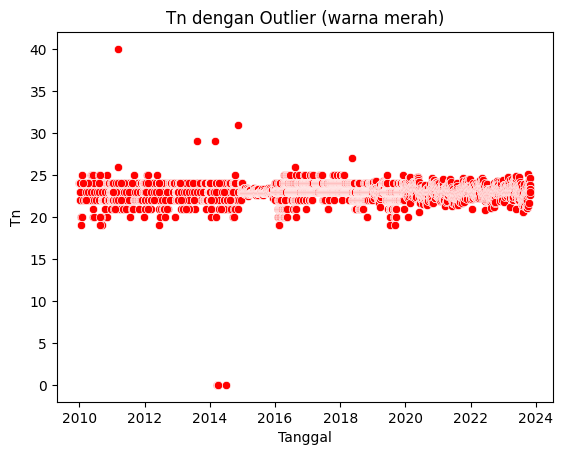

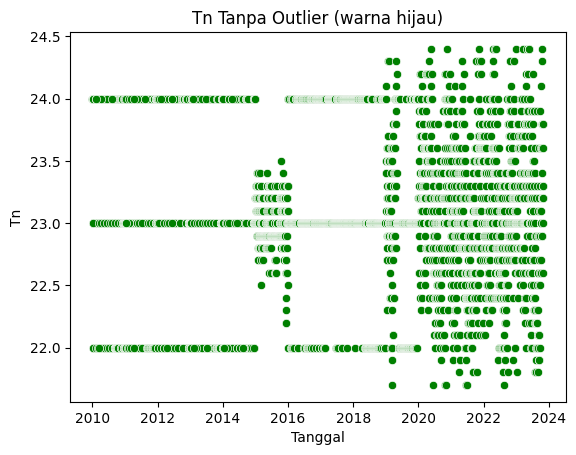

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='Tn', color='red')
plt.title('Tn dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['Tn'].quantile(0.25)
Q3 = df['Tn'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['Tn'] >= batas_bawah) & (df['Tn'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='Tn', color='green')
plt.title('Tn Tanpa Outlier (warna hijau)')
plt.show()

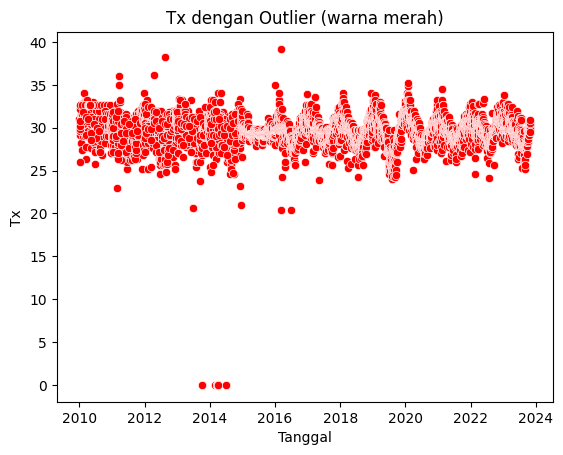

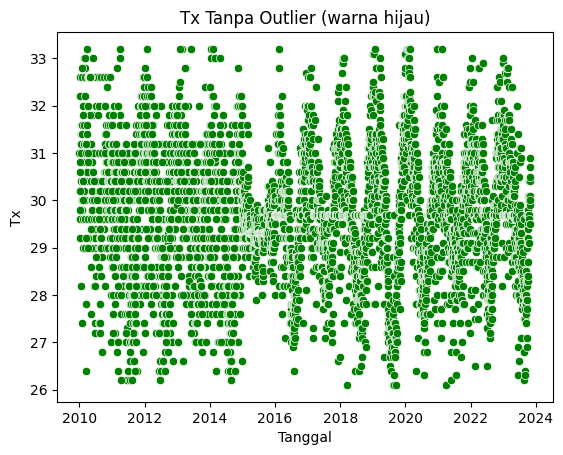

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='Tx', color='red')
plt.title('Tx dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['Tx'].quantile(0.25)
Q3 = df['Tx'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['Tx'] >= batas_bawah) & (df['Tx'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='Tx', color='green')
plt.title('Tx Tanpa Outlier (warna hijau)')
plt.show()

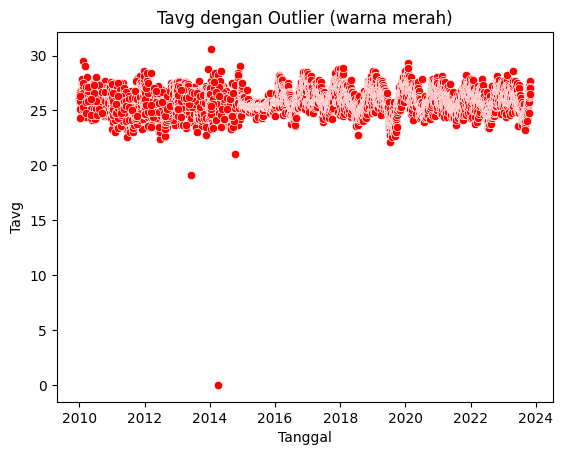

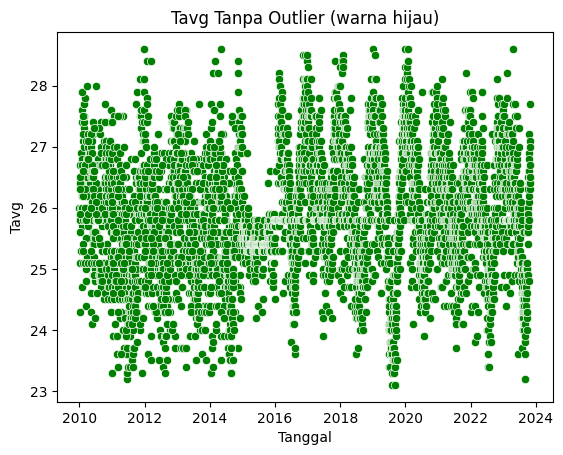

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='Tavg', color='red')
plt.title('Tavg dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['Tavg'].quantile(0.25)
Q3 = df['Tavg'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['Tavg'] >= batas_bawah) & (df['Tavg'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='Tavg', color='green')
plt.title('Tavg Tanpa Outlier (warna hijau)')
plt.show()

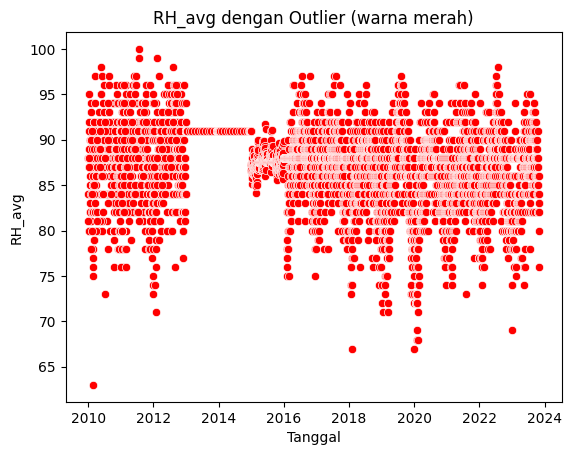

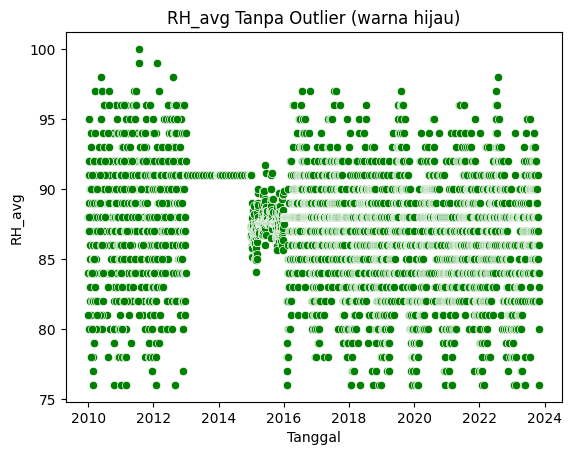

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='RH_avg', color='red')
plt.title('RH_avg dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['RH_avg'].quantile(0.25)
Q3 = df['RH_avg'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['RH_avg'] >= batas_bawah) & (df['RH_avg'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='RH_avg', color='green')
plt.title('RH_avg Tanpa Outlier (warna hijau)')
plt.show()

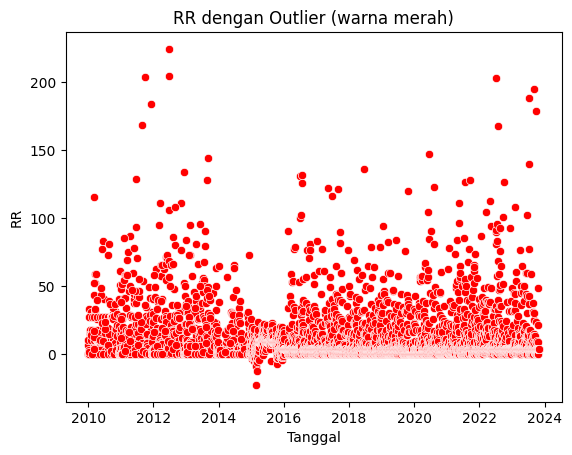

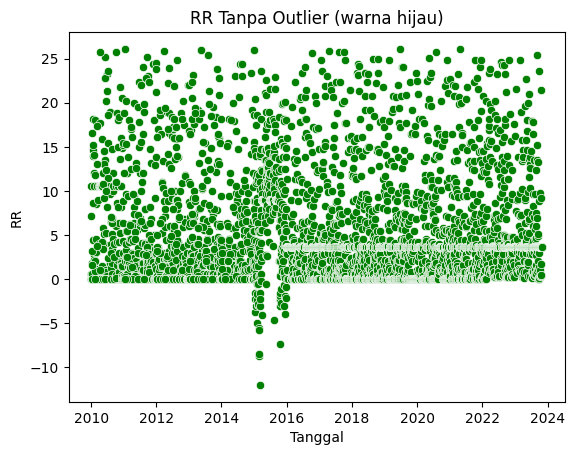

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='RR', color='red')
plt.title('RR dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['RR'].quantile(0.25)
Q3 = df['RR'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['RR'] >= batas_bawah) & (df['RR'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='RR', color='green')
plt.title('RR Tanpa Outlier (warna hijau)')
plt.show()

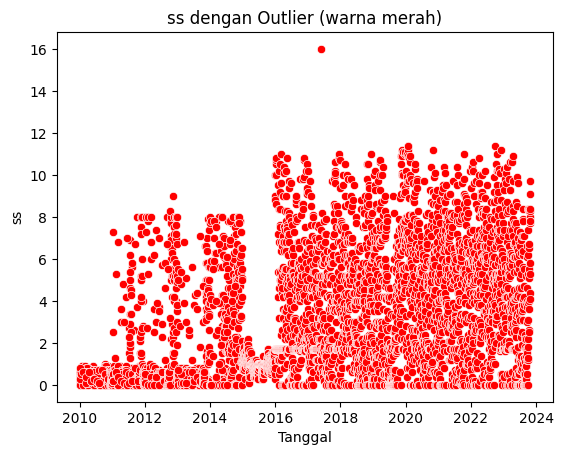

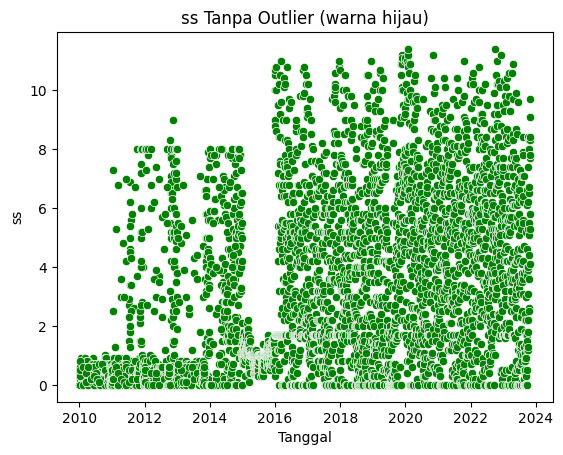

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ss', color='red')
plt.title('ss dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ss'].quantile(0.25)
Q3 = df['ss'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ss'] >= batas_bawah) & (df['ss'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ss', color='green')
plt.title('ss Tanpa Outlier (warna hijau)')
plt.show()

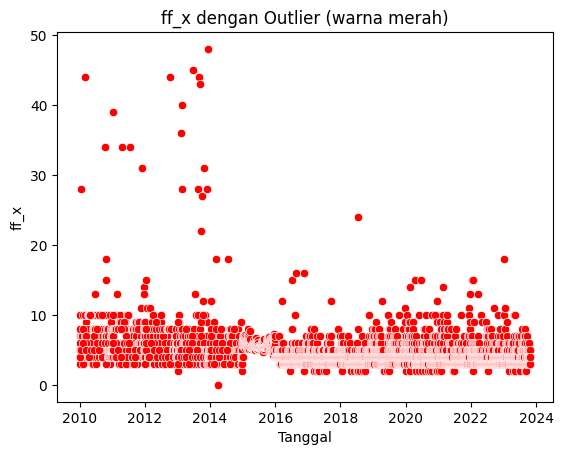

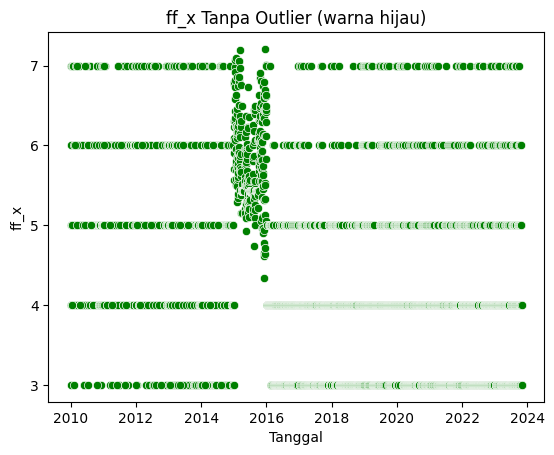

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ff_x', color='red')
plt.title('ff_x dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ff_x'].quantile(0.25)
Q3 = df['ff_x'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ff_x'] >= batas_bawah) & (df['ff_x'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ff_x', color='green')
plt.title('ff_x Tanpa Outlier (warna hijau)')
plt.show()

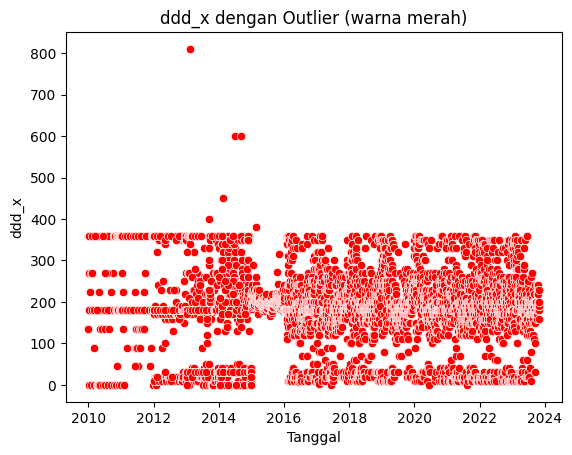

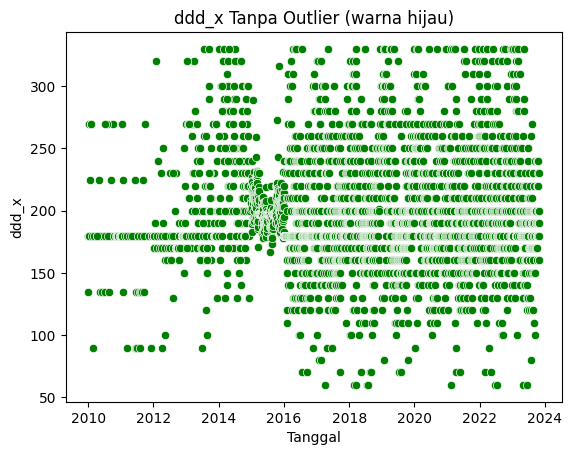

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ddd_x', color='red')
plt.title('ddd_x dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ddd_x'].quantile(0.25)
Q3 = df['ddd_x'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ddd_x'] >= batas_bawah) & (df['ddd_x'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ddd_x', color='green')
plt.title('ddd_x Tanpa Outlier (warna hijau)')
plt.show()

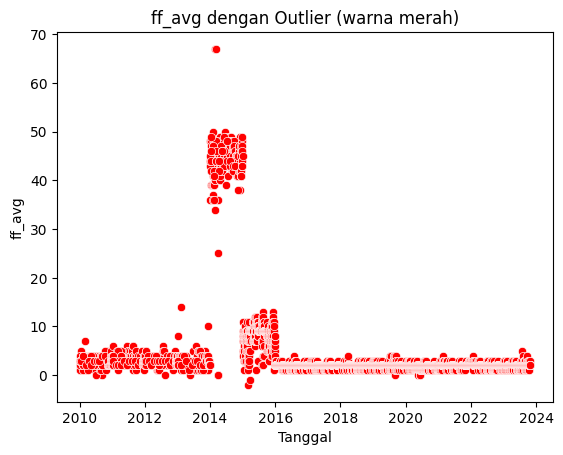

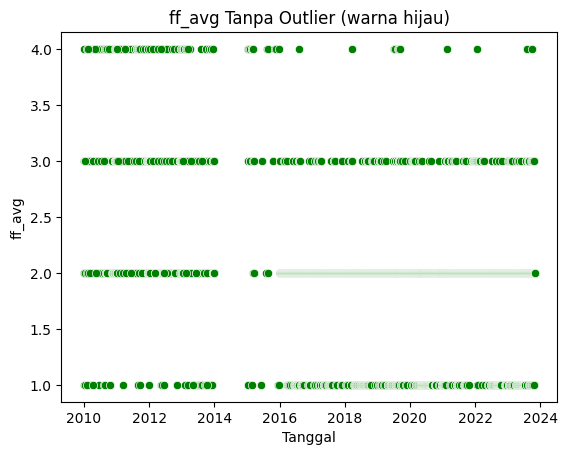

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan outlier dengan warna merah
sns.scatterplot(data=df, x='Tanggal', y='ff_avg', color='red')
plt.title('ff_avg dengan Outlier (warna merah)')
plt.show()

# Menghapus outlier
Q1 = df['ff_avg'].quantile(0.25)
Q3 = df['ff_avg'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

data_tanpa_outlier = df[(df['ff_avg'] >= batas_bawah) & (df['ff_avg'] <= batas_atas)]

# Menampilkan grafik tanpa outlier dengan warna hijau
sns.scatterplot(data=data_tanpa_outlier, x='Tanggal', y='ff_avg', color='green')
plt.title('ff_avg Tanpa Outlier (warna hijau)')
plt.show()

In [16]:
#memeriksa presentase missing values pada setiap variable
#menghitung jumlah sampel
n = len(df)
n
missing = df.isna().sum()/n*100
missing

Tanggal    0.0
Tn         0.0
Tx         0.0
Tavg       0.0
RH_avg     0.0
RR         0.0
ss         0.0
ff_x       0.0
ddd_x      0.0
ff_avg     0.0
ddd_car    0.0
dtype: float64

In [17]:
#menyimpan data setelah pra pemrosesan data
df.to_csv('2010-2023 clean 1 tanpa outlier.csv', index = False)

In [18]:
#menghitung nilai korelasi
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('2010-2023 clean 1 tanpa outlier.csv')
df.corr()

<ipython-input-18-6dd85063db4c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
Tn,1.000000,0.405568,0.526625,-0.093037,-0.067132,0.096813,-0.005122,0.031587,-0.070805
Tx,0.405568,1.000000,0.684916,-0.426125,-0.143084,0.182100,0.054835,0.113539,-0.093419
Tavg,0.526625,0.684916,1.000000,-0.527665,-0.179832,0.275593,-0.018274,0.071754,-0.060201
RH_avg,-0.093037,-0.426125,-0.527665,1.000000,0.206594,-0.296181,0.015032,-0.097661,0.243046
RR,-0.067132,-0.143084,-0.179832,0.206594,1.000000,-0.109591,0.011577,-0.001549,-0.085212
ss,0.096813,0.182100,0.275593,-0.296181,-0.109591,1.000000,-0.172047,-0.011961,-0.074467
ff_x,-0.005122,0.054835,-0.018274,0.015032,0.011577,-0.172047,1.000000,0.111044,0.032052
ddd_x,0.031587,0.113539,0.071754,-0.097661,-0.001549,-0.011961,0.111044,1.000000,-0.053064
ff_avg,-0.070805,-0.093419,-0.060201,0.243046,-0.085212,-0.074467,0.032052,-0.053064,1.000000


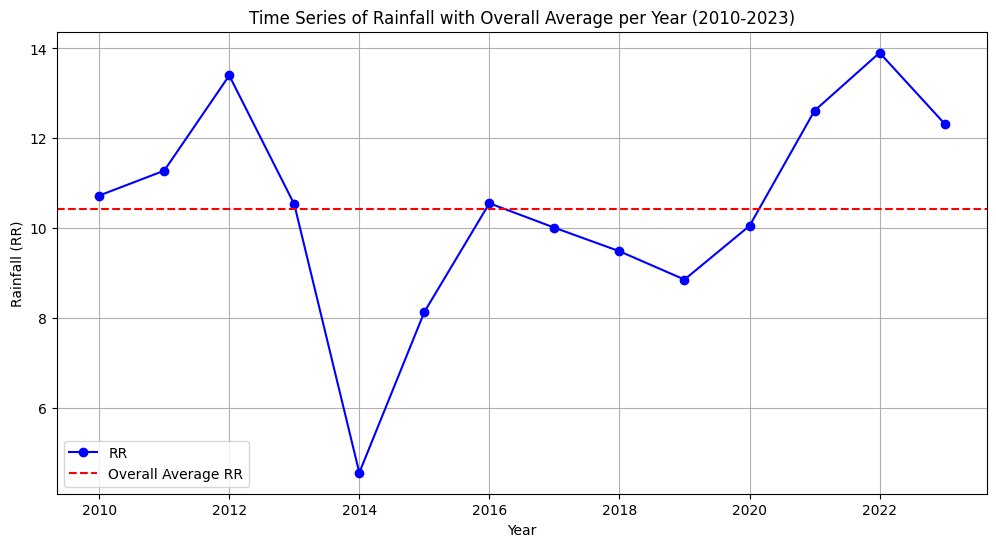

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('2010-2023 clean 1 tanpa outlier.csv')

# Ensure 'Tanggal' column is in datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Extract year from 'Tanggal' column
data['Year'] = data['Tanggal'].dt.year

# Group by year and calculate mean for 'RR'
annual_data_rr = data.groupby('Year')['RR'].mean().reset_index()

# Calculate overall average (global average) for 'RR'
overall_average_rr = data['RR'].mean()

# Plotting time series for 'RR' and Overall Average 'RR'
plt.figure(figsize=(12, 6))
plt.plot(annual_data_rr['Year'], annual_data_rr['RR'], label='RR', marker='o', linestyle='-', color='blue')
plt.axhline(y=overall_average_rr, color='red', linestyle='--', label='Overall Average RR')

# Set labels and title for 'RR'
plt.xlabel('Year')
plt.ylabel('Rainfall (RR)')
plt.title('Time Series of Rainfall with Overall Average per Year (2010-2023)')
plt.legend()
plt.grid(True)
plt.show()


# **FORECASTING UNTUK TAHUN 2024-2026**

variable independen: temperature (Tavg), kelembapan (RH_avg), kecepatan angin (ff_avg), dan lamanya penyinaran matahari (ss)

variable dependen: Curah hujan (RR)

# ***REGRESI LINIER***

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the specified columns
data = pd.read_csv('2010-2023 clean 1 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg','ff_avg', 'ff_x', 'ss', 'ddd_x', 'RH_avg']
target =  'RR' # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')

# Forecasting for the year 2015
# Assuming '2010-2023 clean 1 tanpa outlier.csv' contains the same features as your original dataset
forecast_data = pd.read_csv('2010-2023 clean 1 tanpa outlier.csv')
forecast_predictions = model.predict(forecast_data[features])

# Round the forecast predictions to two decimal places
forecast_predictions_RR = [round(pred, 2) for pred in forecast_predictions]

# Create a DataFrame for the forecast results
forecast_results = pd.DataFrame({'Predicted': forecast_predictions_RR})

# Add the 'ff_x' column from the original data (actual values)
forecast_results['Actual'] = data['RR']

# Save the rounded forecast predictions and actual values to a CSV file
forecast_results.to_csv('24-26 LR_RR_with_actual.csv', index=False)

Mean Absolute Error: 10.85226922444681
Mean Absolute Percentage Error (MAPE): 4.00%
Root Mean Squared Error: 18.068417940541302


# ***LSTM***

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import *

# Load your dataset
# Assuming 'your_data.csv' contains the specified columns
data = pd.read_csv('2010-2023 clean 1 tanpa outlier.csv')

# Choose features and target variable
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
target = 'RR'  # Replace with the actual target column name

# Extract features and target variable
X = data[features]
y = data[target].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the test set
predictions_scaled = model.predict(X_test)

# Inverse transform to get actual scale
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Make predictions on the test set
predictions = model.predict(X_test)

def mape_vectorized_v2(y_test, predictions):
    mask = y_test != 0
    return (np.fabs(y_test - predictions)/y_test)[mask].mean()

# Evaluate the model using Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, predictions)
mape = mape_vectorized_v2(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Set squared=False to get RMSE



print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Root Mean Squared Error: {rmse}')


forecast_data_scaled = scaler_X.transform(data[features])
forecast_data_reshaped = forecast_data_scaled.reshape((forecast_data_scaled.shape[0], 1, forecast_data_scaled.shape[1]))

forecast_predictions_scaled = model.predict(forecast_data_reshaped)
forecast_predictions = scaler_y.inverse_transform(forecast_predictions_scaled)

# Combine actual RR values with forecasted values
forecast_result_df = pd.DataFrame({'Actual': data['RR'], 'Predicted': forecast_predictions.flatten()})
forecast_result_df.to_csv('24-26_RR_LSTM.csv', index=False)

Epoch 1/50
127/127 [==============================] - 3s 7ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 2/50
127/127 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 3/50
127/127 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 4/50
127/127 [==============================] - 1s 4ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 5/50
127/127 [==============================] - 1s 5ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 6/50
127/127 [==============================] - 1s 6ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 7/50
127/127 [==============================] - 1s 5ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 8/50
127/127 [==============================] - 1s 5ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 9/50
127/127 [==============================] - 1s 6ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 10/50
127/127 [==============================] - 1s 5ms/step - loss: 0.0058 - val_loss: 0.0054

# ***Visualisasi REGRESI LINIER 2024-2026***

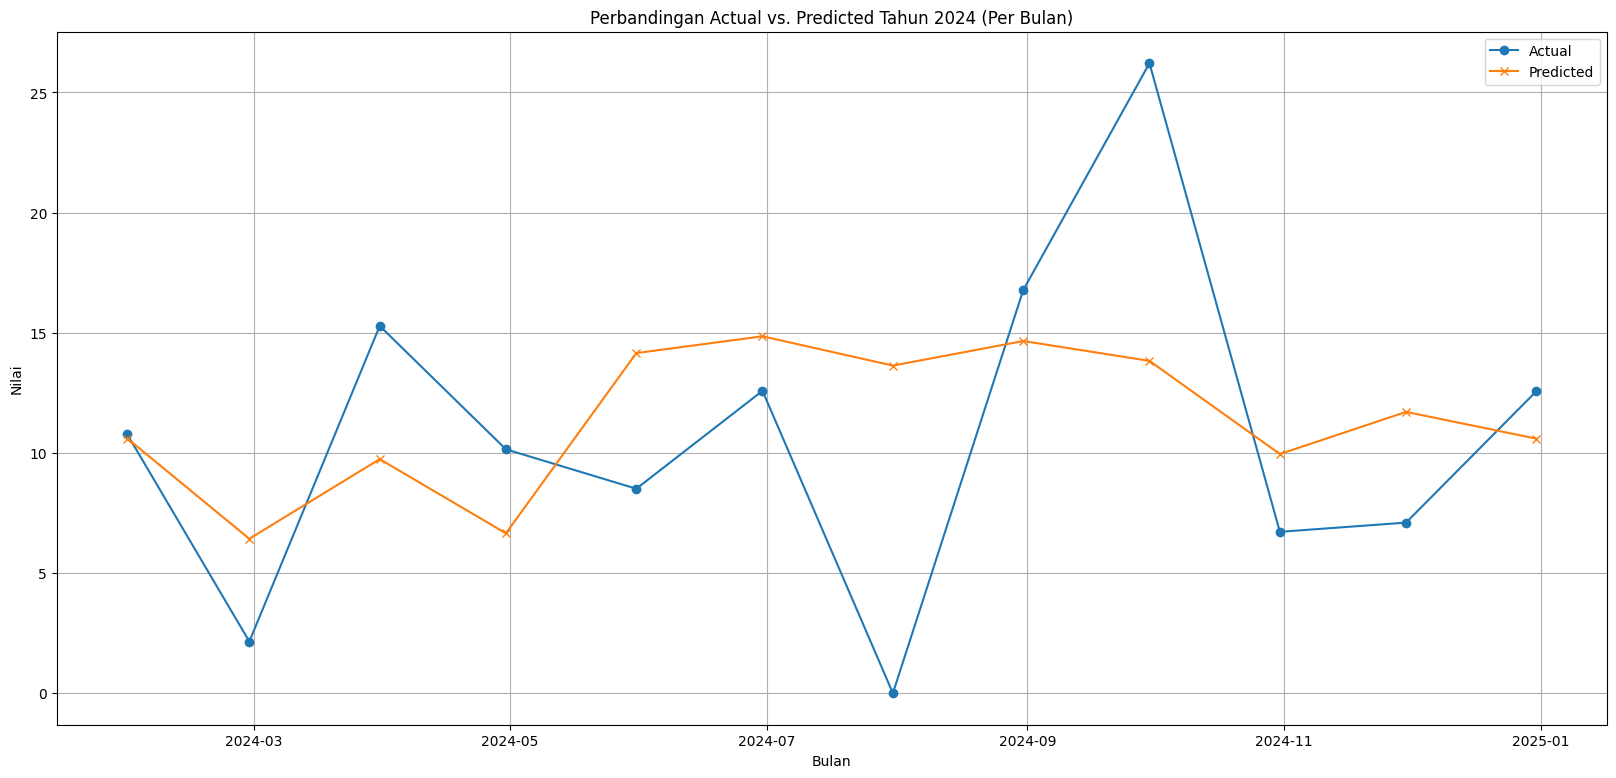

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh dataset (gantilah dengan dataset sesungguhnya)
data = pd.read_csv('24-26 LR_RR_with_actual.csv')
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Filter data untuk tahun 2024
data_2024 = data[data['Tanggal'].dt.year == 2024]

# Resample data per bulan
data_2024_resampled = data_2024.set_index('Tanggal').resample('M').mean()

# Reindex untuk memastikan semua bulan dari Januari hingga Desember ada dalam data
all_months = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
data_2024_resampled = data_2024_resampled.reindex(all_months)

# Membuat grafik perbandingan
plt.figure(figsize=(20, 9))
plt.plot(data_2024_resampled['Actual'], label='Actual', marker='o')
plt.plot(data_2024_resampled['Predicted'], label='Predicted', marker='x')
plt.title('Perbandingan Actual vs. Predicted Tahun 2024 (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
# Menyimpan grafik ke dalam file PNG
plt.savefig('LR RR_2024.png')
plt.show()


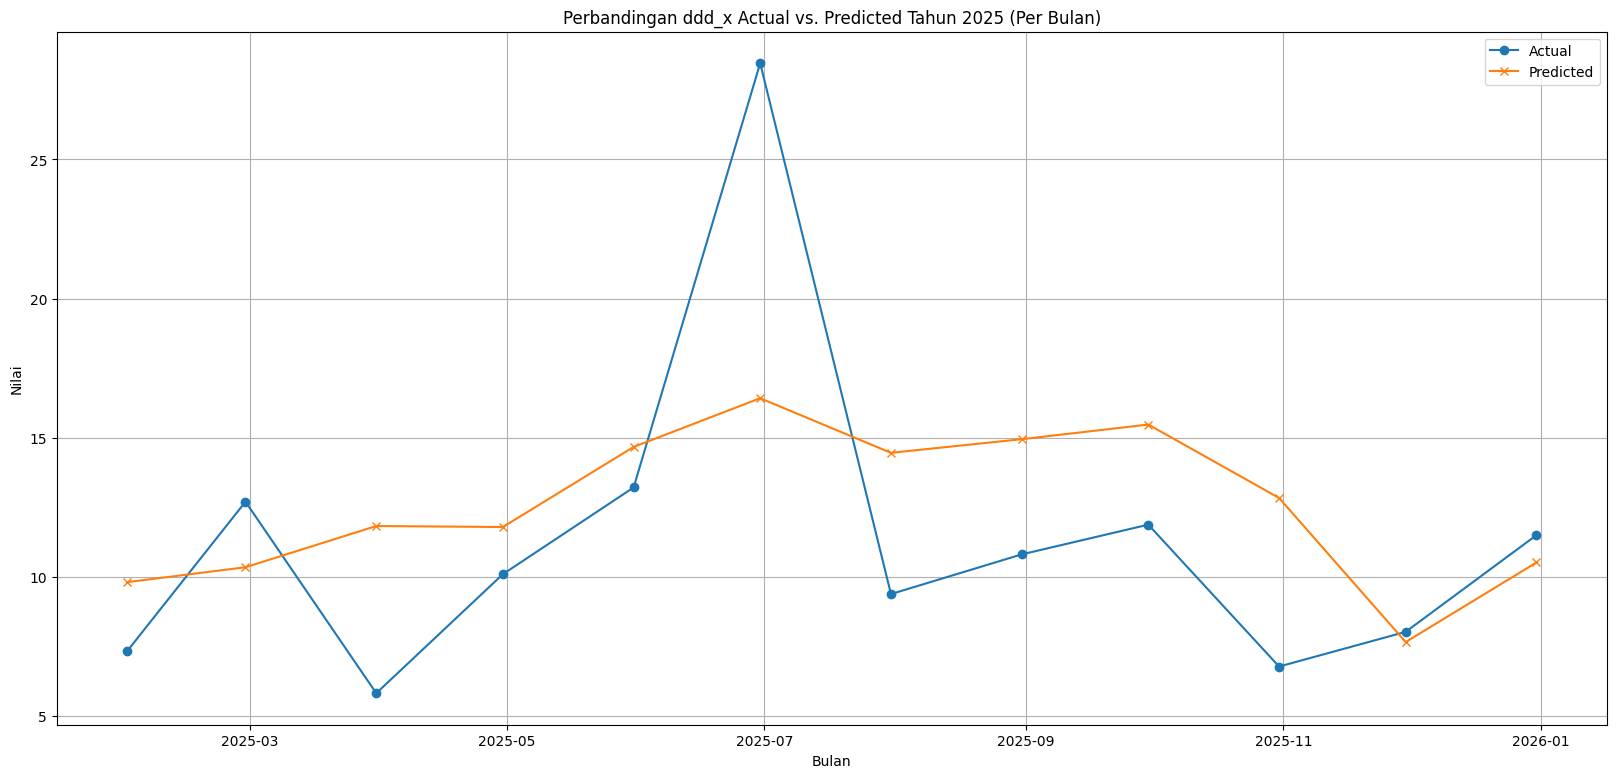

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh dataset (gantilah dengan dataset sesungguhnya)
data = pd.read_csv('24-26 LR_RR_with_actual.csv')
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Filter data untuk tahun 2025
data_2025 = data[data['Tanggal'].dt.year == 2025]

# Resample data per bulan
data_2025_resampled = data_2025.set_index('Tanggal').resample('M').mean()

# Reindex untuk memastikan semua bulan dari Januari hingga Desember ada dalam data
all_months = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')
data_2025_resampled = data_2025_resampled.reindex(all_months)

# Membuat grafik perbandingan
plt.figure(figsize=(20, 9))
plt.plot(data_2025_resampled['Actual'], label='Actual', marker='o')
plt.plot(data_2025_resampled['Predicted'], label='Predicted', marker='x')
plt.title('Perbandingan ddd_x Actual vs. Predicted Tahun 2025 (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
# Menyimpan grafik ke dalam file PNG
plt.savefig('LR RR_2025.png')
plt.show()


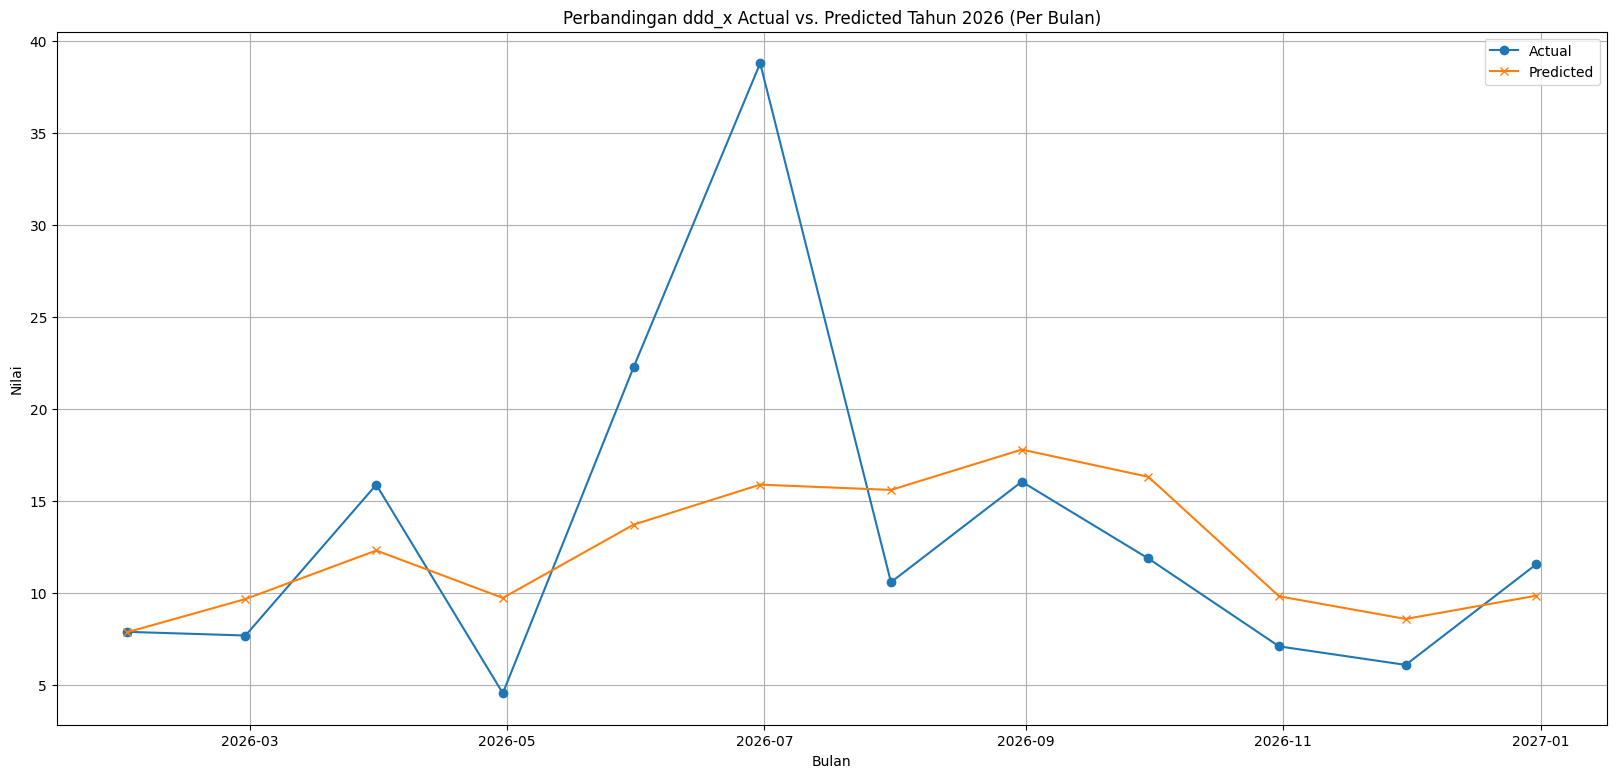

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh dataset (gantilah dengan dataset sesungguhnya)
data = pd.read_csv('24-26 LR_RR_with_actual.csv')
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Filter data untuk tahun 2026
data_2026 = data[data['Tanggal'].dt.year == 2026]

# Resample data per bulan
data_2026_resampled = data_2026.set_index('Tanggal').resample('M').mean()

# Reindex untuk memastikan semua bulan dari Januari hingga Desember ada dalam data
all_months = pd.date_range(start='2026-01-01', end='2026-12-31', freq='M')
data_2026_resampled = data_2026_resampled.reindex(all_months)

# Membuat grafik perbandingan
plt.figure(figsize=(20, 9))
plt.plot(data_2026_resampled['Actual'], label='Actual', marker='o')
plt.plot(data_2026_resampled['Predicted'], label='Predicted', marker='x')
plt.title('Perbandingan ddd_x Actual vs. Predicted Tahun 2026 (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
# Menyimpan grafik ke dalam file PNG
plt.savefig('LR RR_2026.png')
plt.show()


# ***VISUALISASI LSTM 2024-2026***

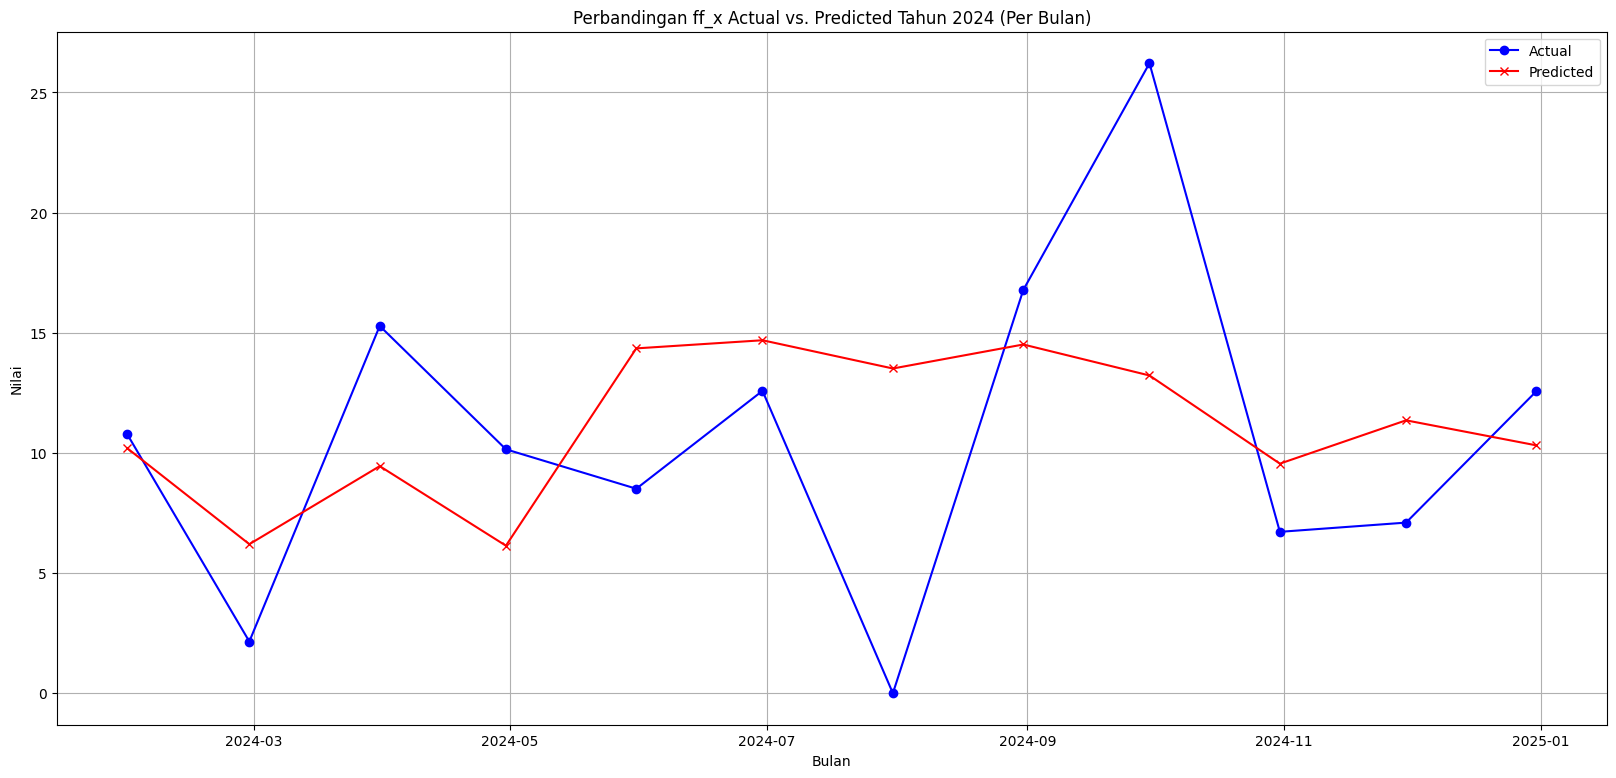

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh dataset (gantilah dengan dataset sesungguhnya)
data = pd.read_csv('24-26_RR_LSTM.csv')
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Filter data untuk tahun 2024
data_2024 = data[data['Tanggal'].dt.year == 2024]

# Resample data per bulan
data_2024_resampled = data_2024.set_index('Tanggal').resample('M').mean()

# Reindex untuk memastikan semua bulan dari Januari hingga Desember ada dalam data
all_months_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
data_2024_resampled = data_2024_resampled.reindex(all_months_2024)

# Membuat grafik perbandingan
plt.figure(figsize=(20, 9))
plt.plot(data_2024_resampled['Actual'], label='Actual', marker='o', color='blue')
plt.plot(data_2024_resampled['Predicted'], label='Predicted', marker='x', color='red')
plt.title('Perbandingan ff_x Actual vs. Predicted Tahun 2024 (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
# Menyimpan grafik ke dalam file PNG
plt.savefig('LSTM RR_2024.png')
plt.show()


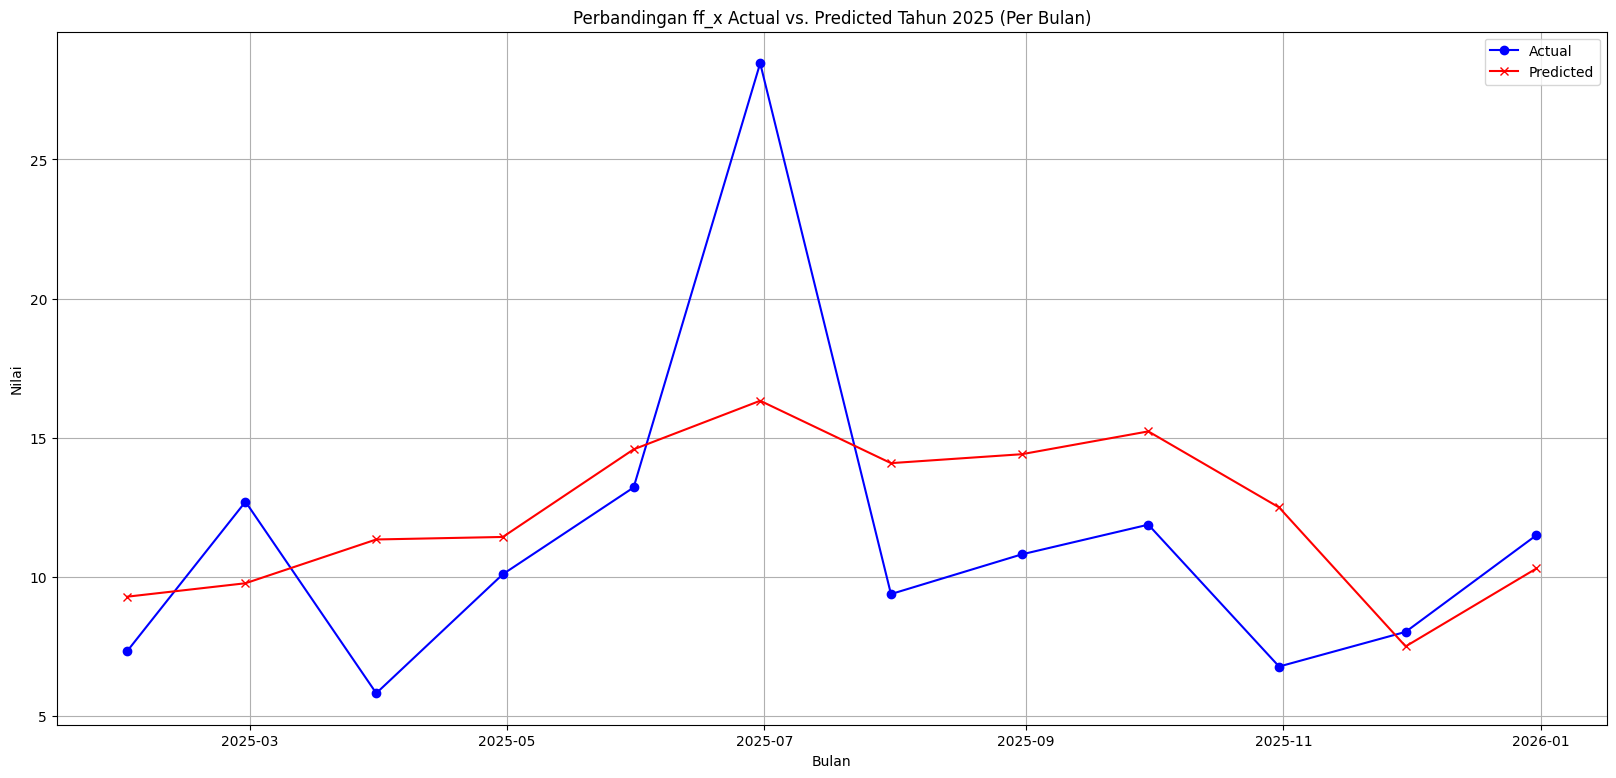

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh dataset (gantilah dengan dataset sesungguhnya)
data = pd.read_csv('24-26_RR_LSTM.csv')
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Filter data untuk tahun 2025
data_2025 = data[data['Tanggal'].dt.year == 2025]

# Resample data per bulan
data_2025_resampled = data_2025.set_index('Tanggal').resample('M').mean()

# Reindex untuk memastikan semua bulan dari Januari hingga Desember ada dalam data
all_months_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')
data_2025_resampled = data_2025_resampled.reindex(all_months_2025)

# Membuat grafik perbandingan
plt.figure(figsize=(20, 9))
plt.plot(data_2025_resampled['Actual'], label='Actual', marker='o', color='blue')
plt.plot(data_2025_resampled['Predicted'], label='Predicted', marker='x', color='red')
plt.title('Perbandingan ff_x Actual vs. Predicted Tahun 2025 (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.grid(True)
# Menyimpan grafik ke dalam file PNG
plt.savefig('LSTM RR_2025.png')
plt.show()


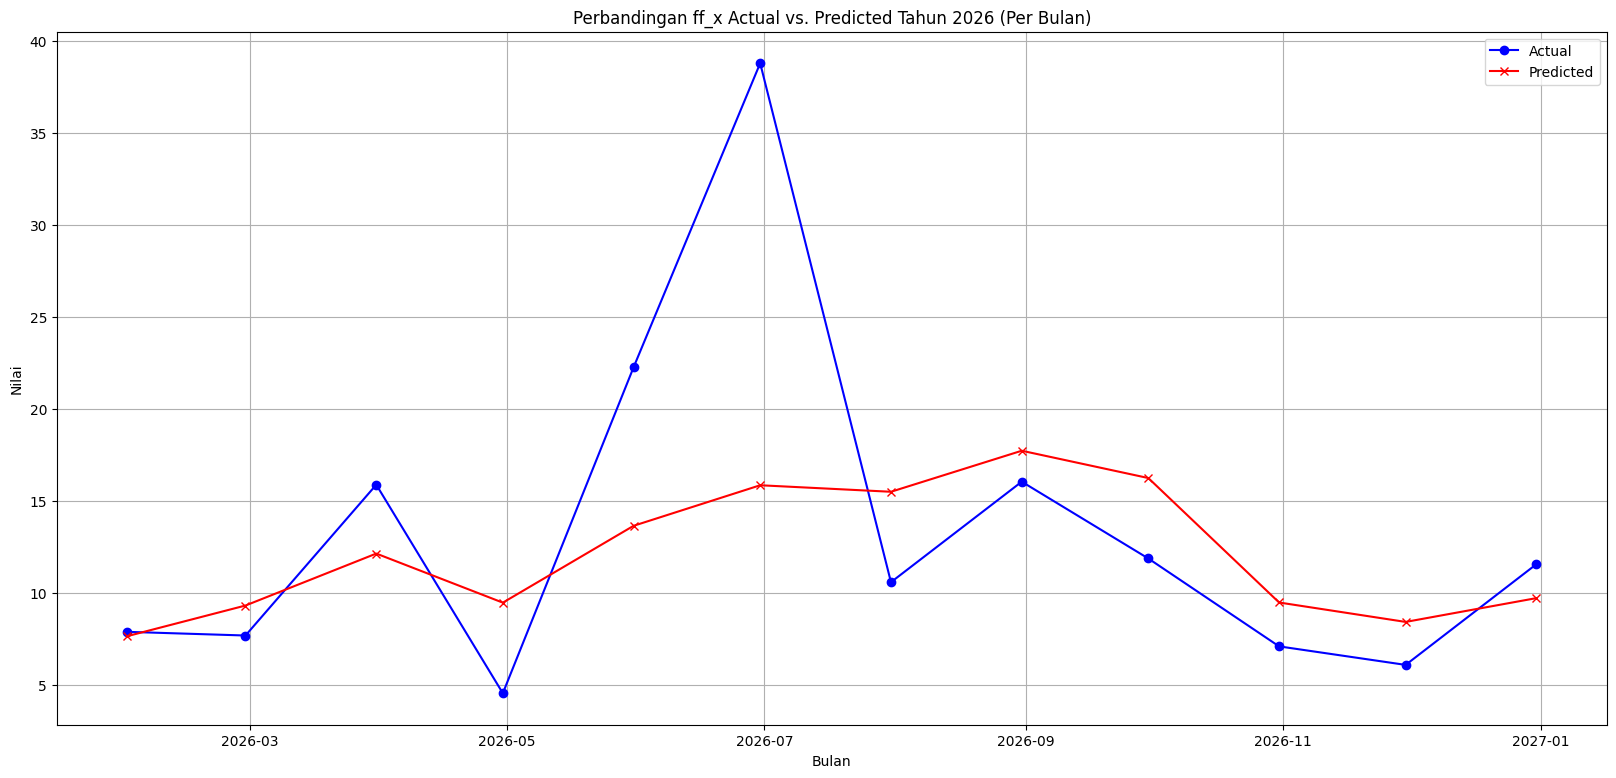

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh dataset (gantilah dengan dataset sesungguhnya)
data = pd.read_csv('24-26_RR_LSTM.csv')
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Filter data untuk tahun 2026
data_2026 = data[data['Tanggal'].dt.year == 2026]

# Resample data per bulan
data_2026_resampled = data_2026.set_index('Tanggal').resample('M').mean()

# Reindex untuk memastikan semua bulan dari Januari hingga Desember ada dalam data
all_months_2026 = pd.date_range(start='2026-01-01', end='2026-12-31', freq='M')
data_2026_resampled = data_2026_resampled.reindex(all_months_2026)

# Membuat grafik perbandingan
plt.figure(figsize=(20, 9))
plt.plot(data_2026_resampled['Actual'], label='Actual', marker='o', color='blue')
plt.plot(data_2026_resampled['Predicted'], label='Predicted', marker='x', color='red')
plt.title('Perbandingan ff_x Actual vs. Predicted Tahun 2026 (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.grid(True)
# Menyimpan grafik ke dalam file PNG
plt.savefig('LSTM RR_2026.png')
plt.show()


# **MEMBACA DATA PERTAHUN: LINEAR REGRESI**

In [7]:
import pandas as pd

# Load your dataset
# Assuming 'forecast_results_RR.csv' is the actual file name and path
forecast_results = pd.read_csv('24-26 LR_RR_with_actual.csv')

# Convert the 'Date' column to datetime format
forecast_results['Tanggal'] = pd.to_datetime(forecast_results['Tanggal'])

# Filter data for the year 2024
forecast_2024 = forecast_results[forecast_results['Tanggal'].dt.year == 2024]

# Display the data for the year 2024
forecast_2024.to_csv('LR RR 2024.csv', index=False)
forecast_2024

,Tanggal,Predicted,Actual
0,2024-01-01,12.44,0.6
1,2024-01-02,11.01,2.7
2,2024-01-03,13.17,8.5
3,2024-01-04,7.91,0.5
4,2024-01-05,17.28,4.2
...,...,...,...
361,2024-12-27,10.15,3.0
362,2024-12-28,18.86,4.3
363,2024-12-29,9.94,15.4
364,2024-12-30,15.40,48.3


In [8]:
forecast_2025 = forecast_results[forecast_results['Tanggal'].dt.year == 2025]
forecast_2025.to_csv('LR RR 2025.csv', index=False)
forecast_2025

,Tanggal,Predicted,Actual
366,2025-01-01,4.47,2.5
367,2025-01-02,5.54,0.0
368,2025-01-03,7.33,0.0
369,2025-01-04,3.62,0.0
370,2025-01-05,6.97,5.6
...,...,...,...
726,2025-12-27,20.08,24.5
727,2025-12-28,17.10,1.2
728,2025-12-29,8.08,21.2
729,2025-12-30,17.33,40.4


In [9]:
forecast_2026 = forecast_results[forecast_results['Tanggal'].dt.year == 2026]
forecast_2026.to_csv('LR RR 2026.csv', index=False)
forecast_2026

,Tanggal,Predicted,Actual
731,2026-01-01,15.03,26.7
732,2026-01-02,13.93,11.0
733,2026-01-03,13.13,57.6
734,2026-01-04,14.02,0.2
735,2026-01-05,14.06,0.3
...,...,...,...
1091,2026-12-27,15.63,84.0
1092,2026-12-28,15.00,37.0
1093,2026-12-29,6.04,22.0
1094,2026-12-30,6.83,0.0


# **LSTM**

In [10]:
import pandas as pd


LSTM_results = pd.read_csv('24-26_RR_LSTM.csv')

# Convert the 'Date' column to datetime format
LSTM_results['Tanggal'] = pd.to_datetime(LSTM_results['Tanggal'])

# Filter data for the year 2024
LSTM_2024 = LSTM_results[LSTM_results['Tanggal'].dt.year == 2024]

LSTM_2024.to_csv('LSTM RR 2024.csv', index=False)
LSTM_2024

,Tanggal,Actual,Predicted
0,2024-01-01,0.6,11.986575
1,2024-01-02,2.7,10.624697
2,2024-01-03,8.5,13.060537
3,2024-01-04,0.5,7.393163
4,2024-01-05,4.2,17.485361
...,...,...,...
361,2024-12-27,3.0,9.682976
362,2024-12-28,4.3,19.082306
363,2024-12-29,15.4,9.217422
364,2024-12-30,48.3,15.577175


In [11]:
# Filter data for the year 2025
LSTM_2025 = LSTM_results[LSTM_results['Tanggal'].dt.year == 2025]

LSTM_2025.to_csv('LSTM RR 2025.csv', index=False)
LSTM_2025

,Tanggal,Actual,Predicted
366,2025-01-01,2.5,3.607045
367,2025-01-02,0.0,4.880090
368,2025-01-03,0.0,6.640863
369,2025-01-04,0.0,3.217487
370,2025-01-05,5.6,6.249782
...,...,...,...
726,2025-12-27,24.5,20.319086
727,2025-12-28,1.2,17.360394
728,2025-12-29,21.2,7.468122
729,2025-12-30,40.4,17.747270


In [12]:
# Filter data for the year 2025
LSTM_2026 = LSTM_results[LSTM_results['Tanggal'].dt.year == 2026]

LSTM_2026.to_csv('LSTM RR 2026.csv', index=False)
LSTM_2026

,Tanggal,Actual,Predicted
731,2026-01-01,26.7,15.434045
732,2026-01-02,11.0,13.859942
733,2026-01-03,57.6,12.611445
734,2026-01-04,0.2,13.663080
735,2026-01-05,0.3,14.658810
...,...,...,...
1091,2026-12-27,84.0,15.467508
1092,2026-12-28,37.0,14.879145
1093,2026-12-29,22.0,6.027587
1094,2026-12-30,0.0,6.659752


# **LINEAR REGRESI**

<ipython-input-16-ba4b31dea0fc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2024['Month'] = forecast_2024['Tanggal'].dt.month
<ipython-input-16-ba4b31dea0fc>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sum_2024 = forecast_2024.groupby('Month')['Predicted', 'Actual'].sum().reset_index()


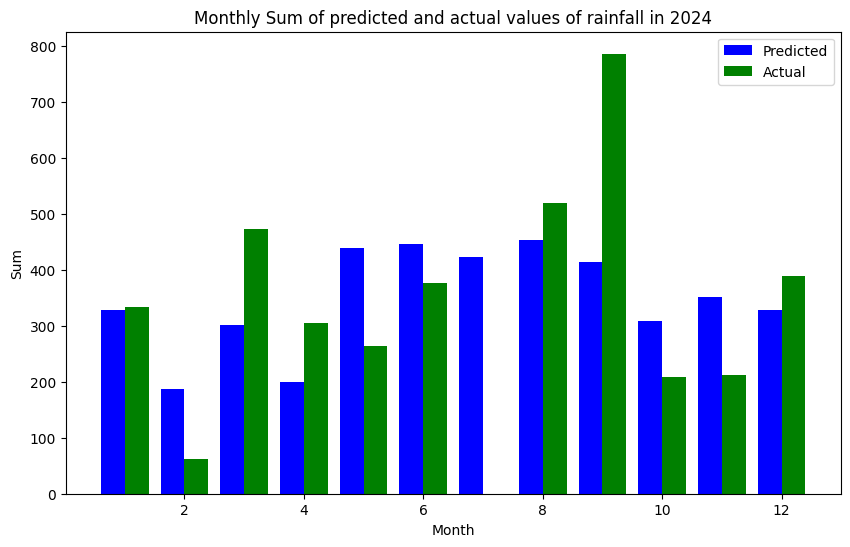

    Month  Predicted  Actual
0       1     328.59   333.8
1       2     186.37    62.4
2       3     302.00   473.8
3       4     199.61   304.5
4       5     438.79   263.8
5       6     445.60   377.5
6       7     422.65     0.0
7       8     454.33   520.2
8       9     414.90   786.5
9      10     308.52   208.2
10     11     351.20   213.0
11     12     328.40   389.7


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
forecast_results = pd.read_csv('24-26 LR_RR_with_actual.csv')

# Convert the 'Tanggal' column to datetime format
forecast_results['Tanggal'] = pd.to_datetime(forecast_results['Tanggal'])

# Filter data for the year 2024
forecast_2024 = forecast_results[forecast_results['Tanggal'].dt.year == 2024]

# Extract month from 'Tanggal' column
forecast_2024['Month'] = forecast_2024['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in 2024
monthly_sum_2024 = forecast_2024.groupby('Month')['Predicted', 'Actual'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot monthly sum of ff_x
plt.bar(monthly_sum_2024['Month'] - 0.2, monthly_sum_2024['Predicted'], width=0.4, color='blue', label='Predicted')

# Plot monthly sum of ddd_x
plt.bar(monthly_sum_2024['Month'] + 0.2, monthly_sum_2024['Actual'], width=0.4, color='green', label='Actual')

# Adjust plot labels and title
plt.title('Monthly Sum of predicted and actual values of rainfall in 2024')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()

# Save the plot to a file (optional)
plt.savefig('monthly_sum_LR_2024_plot.png')

# Show the plot
plt.show()
print(monthly_sum_2024)

# Save the monthly sum data to a CSV file
monthly_sum_2024.to_csv('monthly_sum_LR_2024.csv', index=False)


<ipython-input-17-274b738a7f2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2025['Month'] = forecast_2025['Tanggal'].dt.month
<ipython-input-17-274b738a7f2c>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sum_2025 = forecast_2025.groupby('Month')['Predicted', 'Actual'].sum().reset_index()


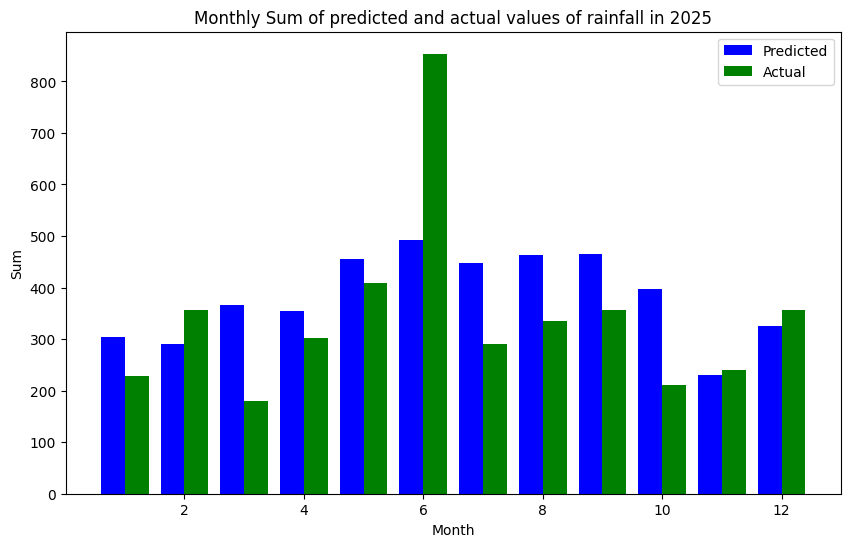

    Month  Predicted  Actual
0       1     304.41   227.8
1       2     289.91   355.8
2       3     366.86   180.7
3       4     353.95   303.1
4       5     454.91   409.8
5       6     492.73   853.7
6       7     448.36   291.1
7       8     463.55   335.3
8       9     464.37   356.5
9      10     398.10   210.4
10     11     230.01   241.0
11     12     326.29   356.7


In [17]:
# Filter data for the year 2025
forecast_2025 = forecast_results[forecast_results['Tanggal'].dt.year == 2025]

# Extract month from 'Tanggal' column
forecast_2025['Month'] = forecast_2025['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in 2024
monthly_sum_2025 = forecast_2025.groupby('Month')['Predicted', 'Actual'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot monthly sum of ff_x
plt.bar(monthly_sum_2025['Month'] - 0.2, monthly_sum_2025['Predicted'], width=0.4, color='blue', label='Predicted')

# Plot monthly sum of ddd_x
plt.bar(monthly_sum_2025['Month'] + 0.2, monthly_sum_2025['Actual'], width=0.4, color='green', label='Actual')

# Adjust plot labels and title
plt.title('Monthly Sum of predicted and actual values of rainfall in 2025')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()

# Save the plot to a file (optional)
plt.savefig('monthly_sum_LR_2025_plot.png')

# Show the plot
plt.show()
print(monthly_sum_2025)

# Save the monthly sum data to a CSV file
monthly_sum_2025.to_csv('monthly_sum_LR_2025.csv', index=False)


<ipython-input-18-b09e34a680c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2026['Month'] = forecast_2026['Tanggal'].dt.month
<ipython-input-18-b09e34a680c8>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sum_2026 = forecast_2026.groupby('Month')['Predicted', 'Actual'].sum().reset_index()


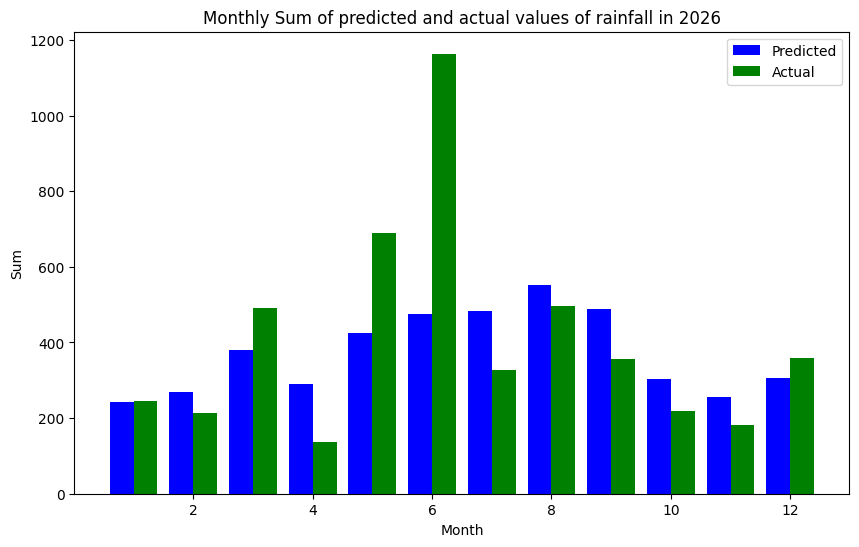

    Month  Predicted  Actual
0       1     243.29   243.9
1       2     270.25   214.7
2       3     381.01   491.9
3       4     291.37   135.9
4       5     424.59   690.0
5       6     476.20  1163.6
6       7     483.11   327.6
7       8     551.12   497.0
8       9     488.96   355.7
9      10     303.77   219.4
10     11     257.05   182.1
11     12     304.91   358.0


In [18]:
# Filter data for the year 2026
forecast_2026 = forecast_results[forecast_results['Tanggal'].dt.year == 2026]

# Extract month from 'Tanggal' column
forecast_2026['Month'] = forecast_2026['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in 2024
monthly_sum_2026 = forecast_2026.groupby('Month')['Predicted', 'Actual'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot monthly sum of ff_x
plt.bar(monthly_sum_2026['Month'] - 0.2, monthly_sum_2026['Predicted'], width=0.4, color='blue', label='Predicted')

# Plot monthly sum of ddd_x
plt.bar(monthly_sum_2026['Month'] + 0.2, monthly_sum_2026['Actual'], width=0.4, color='green', label='Actual')

# Adjust plot labels and title
plt.title('Monthly Sum of predicted and actual values of rainfall in 2026')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()

# Save the plot to a file (optional)
plt.savefig('monthly_sum_LR_2026_plot.png')

# Show the plot
plt.show()
print(monthly_sum_2026)

# Save the monthly sum data to a CSV file
monthly_sum_2026.to_csv('monthly_sum_LR_2026.csv', index=False)


# **LSTM**

<ipython-input-19-730ea5a7124b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2024['Month'] = forecast_2024['Tanggal'].dt.month
<ipython-input-19-730ea5a7124b>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sum_2024 = forecast_2024.groupby('Month')['Predicted', 'Actual'].sum().reset_index()


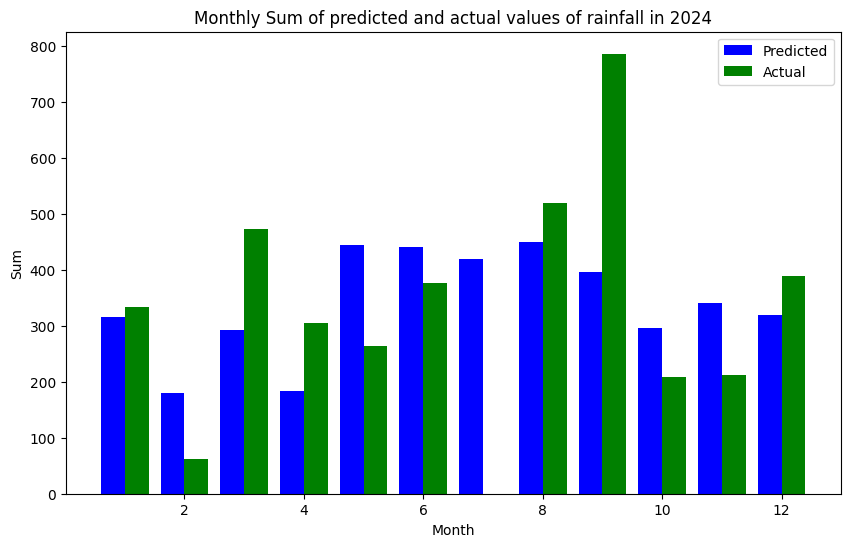

    Month   Predicted  Actual
0       1  315.948223   333.8
1       2  179.847673    62.4
2       3  292.942070   473.8
3       4  184.175235   304.5
4       5  444.853927   263.8
5       6  440.649628   377.5
6       7  418.902530     0.0
7       8  449.872699   520.2
8       9  396.678273   786.5
9      10  296.163818   208.2
10     11  340.687501   213.0
11     12  319.729586   389.7


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
forecast_results = pd.read_csv('24-26_RR_LSTM.csv')

# Convert the 'Tanggal' column to datetime format
forecast_results['Tanggal'] = pd.to_datetime(forecast_results['Tanggal'])

# Filter data for the year 2024
forecast_2024 = forecast_results[forecast_results['Tanggal'].dt.year == 2024]

# Extract month from 'Tanggal' column
forecast_2024['Month'] = forecast_2024['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in 2024
monthly_sum_2024 = forecast_2024.groupby('Month')['Predicted', 'Actual'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot monthly sum of ff_x
plt.bar(monthly_sum_2024['Month'] - 0.2, monthly_sum_2024['Predicted'], width=0.4, color='blue', label='Predicted')

# Plot monthly sum of ddd_x
plt.bar(monthly_sum_2024['Month'] + 0.2, monthly_sum_2024['Actual'], width=0.4, color='green', label='Actual')

# Adjust plot labels and title
plt.title('Monthly Sum of predicted and actual values of rainfall in 2024')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()

# Save the plot to a file (optional)
plt.savefig('monthly_sum_LSTM_2024_plot.png')

# Show the plot
plt.show()
print(monthly_sum_2024)

# Save the monthly sum data to a CSV file
monthly_sum_2024.to_csv('monthly_sum_LSTM_2024.csv', index=False)


<ipython-input-20-68647ccc9efd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2025['Month'] = forecast_2025['Tanggal'].dt.month
<ipython-input-20-68647ccc9efd>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sum_2025 = forecast_2025.groupby('Month')['Predicted', 'Actual'].sum().reset_index()


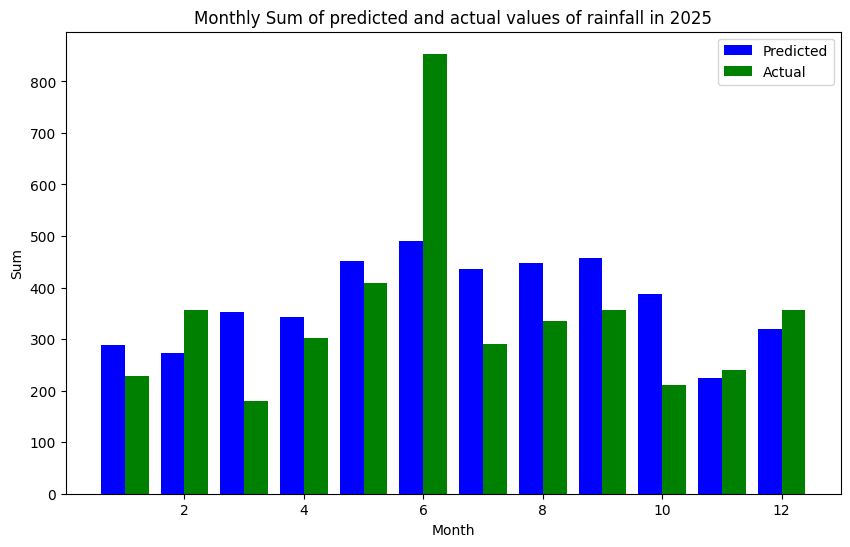

    Month   Predicted  Actual
0       1  288.211701   227.8
1       2  273.806611   355.8
2       3  351.886897   180.7
3       4  343.247270   303.1
4       5  452.232794   409.8
5       6  490.005693   853.7
6       7  436.886128   291.1
7       8  446.816500   335.3
8       9  457.003209   356.5
9      10  387.565148   210.4
10     11  225.340922   241.0
11     12  319.613200   356.7


In [20]:
# Filter data for the year 2025
forecast_2025 = forecast_results[forecast_results['Tanggal'].dt.year == 2025]

# Extract month from 'Tanggal' column
forecast_2025['Month'] = forecast_2025['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in 2024
monthly_sum_2025 = forecast_2025.groupby('Month')['Predicted', 'Actual'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot monthly sum of ff_x
plt.bar(monthly_sum_2025['Month'] - 0.2, monthly_sum_2025['Predicted'], width=0.4, color='blue', label='Predicted')

# Plot monthly sum of ddd_x
plt.bar(monthly_sum_2025['Month'] + 0.2, monthly_sum_2025['Actual'], width=0.4, color='green', label='Actual')

# Adjust plot labels and title
plt.title('Monthly Sum of predicted and actual values of rainfall in 2025')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()

# Save the plot to a file (optional)
plt.savefig('monthly_sum_LSTM_2025_plot.png')

# Show the plot
plt.show()
print(monthly_sum_2025)

# Save the monthly sum data to a CSV file
monthly_sum_2025.to_csv('monthly_sum_LSTM_2025.csv', index=False)


<ipython-input-21-fd389d957c58>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2026['Month'] = forecast_2026['Tanggal'].dt.month
<ipython-input-21-fd389d957c58>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sum_2026 = forecast_2026.groupby('Month')['Predicted', 'Actual'].sum().reset_index()


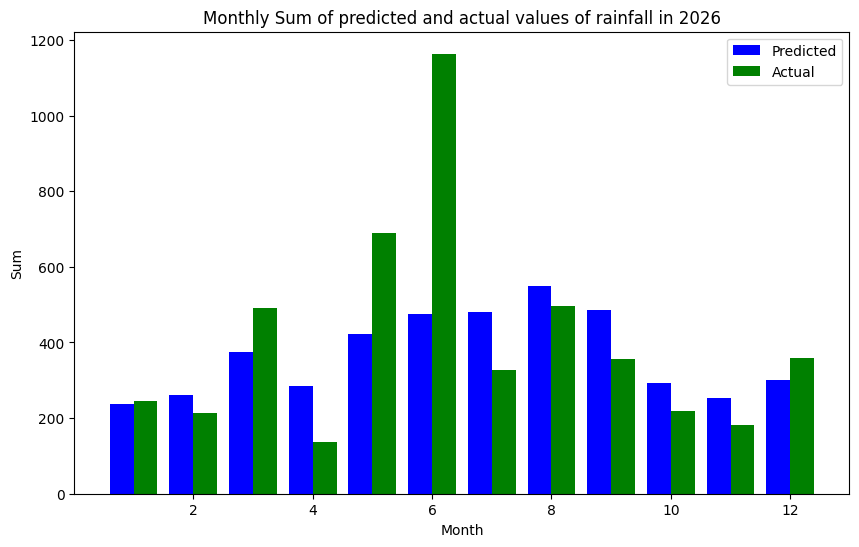

    Month   Predicted  Actual
0       1  236.653721   243.9
1       2  260.356855   214.7
2       3  375.840389   491.9
3       4  283.650774   135.9
4       5  422.662909   690.0
5       6  475.152064  1163.6
6       7  480.004771   327.6
7       8  549.177365   497.0
8       9  486.925433   355.7
9      10  293.358232   219.4
10     11  252.199591   182.1
11     12  300.764906   358.0


In [21]:
# Filter data for the year 2026
forecast_2026 = forecast_results[forecast_results['Tanggal'].dt.year == 2026]

# Extract month from 'Tanggal' column
forecast_2026['Month'] = forecast_2026['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in 2024
monthly_sum_2026 = forecast_2026.groupby('Month')['Predicted', 'Actual'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot monthly sum of ff_x
plt.bar(monthly_sum_2026['Month'] - 0.2, monthly_sum_2026['Predicted'], width=0.4, color='blue', label='Predicted')

# Plot monthly sum of ddd_x
plt.bar(monthly_sum_2026['Month'] + 0.2, monthly_sum_2026['Actual'], width=0.4, color='green', label='Actual')

# Adjust plot labels and title
plt.title('Monthly Sum of predicted and actual values of rainfall in 2026')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()

# Save the plot to a file (optional)
plt.savefig('monthly_sum_LSTM_2026_plot.png')

# Show the plot
plt.show()
print(monthly_sum_2026)

# Save the monthly sum data to a CSV file
monthly_sum_2026.to_csv('monthly_sum_LSTM_2026.csv', index=False)


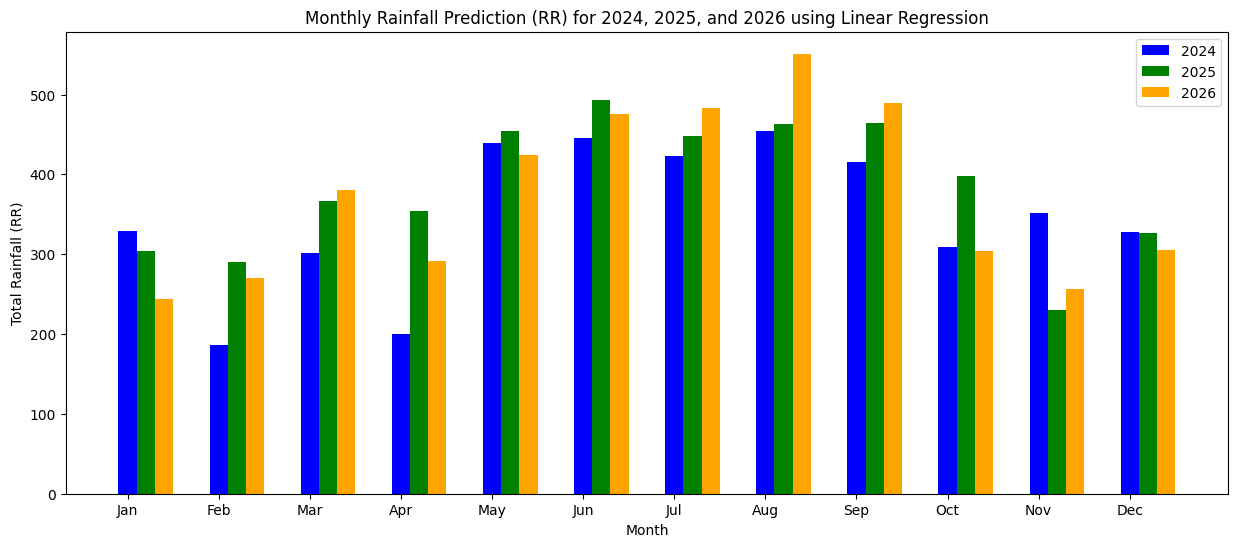

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Assuming 'forecast_results_RR.csv' is the actual file name and path
forecast_results = pd.read_csv('24-26 LR_RR_with_actual.csv')

# Convert the 'Date' column to datetime format
forecast_results['Tanggal'] = pd.to_datetime(forecast_results['Tanggal'])

# Extract year from 'Date' column
forecast_results['Year'] = forecast_results['Tanggal'].dt.year

# Extract month from 'Date' column
forecast_results['Month'] = forecast_results['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in each year
monthly_sum_by_year = forecast_results.groupby(['Year', 'Month'])[['Predicted']].sum().reset_index()

# Create separate DataFrames for each year
forecast_2024 = monthly_sum_by_year[monthly_sum_by_year['Year'] == 2024]
forecast_2025 = monthly_sum_by_year[monthly_sum_by_year['Year'] == 2025]
forecast_2026 = monthly_sum_by_year[monthly_sum_by_year['Year'] == 2026]

# Create a bar plot for monthly wind speed (ff_x) for each year
plt.figure(figsize=(15, 6))

# Plot for 2024
plt.bar(forecast_2024['Month'], forecast_2024['Predicted'], width=0.2, color='blue', label='2024', align='center')

# Plot for 2025
plt.bar(forecast_2025['Month'] + 0.2, forecast_2025['Predicted'], width=0.2, color='green', label='2025', align='center')

# Plot for 2026
plt.bar(forecast_2026['Month'] + 0.4, forecast_2026['Predicted'], width=0.2, color='orange', label='2026', align='center')


plt.xlabel('Month')
plt.ylabel('Total Rainfall (RR)')
plt.title('Monthly Rainfall Prediction (RR) for 2024, 2025, and 2026 using Linear Regression')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
# Save the plot to a file (optional)
plt.savefig('monthly annual RR_sum_LR_plot.png')
plt.show()


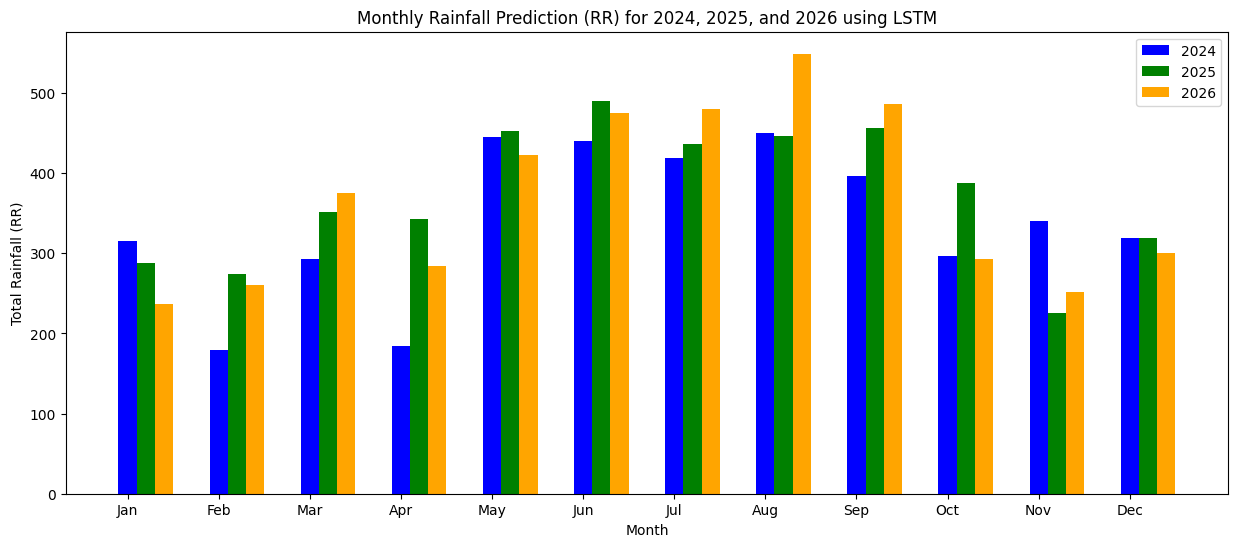

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Assuming 'forecast_results_RR.csv' is the actual file name and path
forecast_results = pd.read_csv('24-26_RR_LSTM.csv')

# Convert the 'Date' column to datetime format
forecast_results['Tanggal'] = pd.to_datetime(forecast_results['Tanggal'])

# Extract year from 'Date' column
forecast_results['Year'] = forecast_results['Tanggal'].dt.year

# Extract month from 'Date' column
forecast_results['Month'] = forecast_results['Tanggal'].dt.month

# Calculate the sum of daily rainfall for each month in each year
monthly_sum_by_year = forecast_results.groupby(['Year', 'Month'])[['Predicted']].sum().reset_index()

# Create separate DataFrames for each year
forecast_2024 = monthly_sum_by_year[monthly_sum_by_year['Year'] == 2024]
forecast_2025 = monthly_sum_by_year[monthly_sum_by_year['Year'] == 2025]
forecast_2026 = monthly_sum_by_year[monthly_sum_by_year['Year'] == 2026]


plt.figure(figsize=(15, 6))

# Plot for 2024
plt.bar(forecast_2024['Month'], forecast_2024['Predicted'], width=0.2, color='blue', label='2024', align='center')

# Plot for 2025
plt.bar(forecast_2025['Month'] + 0.2, forecast_2025['Predicted'], width=0.2, color='green', label='2025', align='center')

# Plot for 2026
plt.bar(forecast_2026['Month'] + 0.4, forecast_2026['Predicted'], width=0.2, color='orange', label='2026', align='center')


plt.xlabel('Month')
plt.ylabel('Total Rainfall (RR)')
plt.title('Monthly Rainfall Prediction (RR) for 2024, 2025, and 2026 using LSTM')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
# Save the plot to a file (optional)
plt.savefig('monthly annual RR_sum_LSTM_plot.png')
plt.show()
